<a href="https://colab.research.google.com/github/henil2097/Analytical-Model-For-Estimating-Tumor-Growth-Rate/blob/master/PE_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [0]:
data = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data

,Group,id,Time,TumVol
0,0,1,0,120.1
1,0,1,1,162.8
2,0,1,2,269.8
3,0,1,3,470.6
4,0,1,4,536.6
...,...,...,...,...
252,3,28,3,273.2
253,3,28,4,321.4
254,3,28,5,387.3
255,3,28,6,601.2


In [0]:
def find_volume(t,A,V0,r):
  return  V0*np.exp(A*(1-np.exp(-r*t)))

In [0]:
import math
def cal_rate(Vinf,t1,t2,V1,V2):
  #Vinf = 753312.102292  #1000000    ################################# Need to check #################################
  #return (math.log(Vinf/V1)-math.log(Vinf/V2))/(t2-t1)
  #return (V2-V1)/V2*100
  return (V1-V2)/t2

In [0]:
data1 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data1 = data1[data1['id'] == 1]
data1

,Group,id,Time,TumVol
0,0,1,0,120.1
1,0,1,1,162.8
2,0,1,2,269.8
3,0,1,3,470.6
4,0,1,4,536.6
5,0,1,5,860.7
6,0,1,6,795.9
7,0,1,7,1013.3


In [0]:
#from scipy.optimize import curve_fit
t1 = data1['Time'].values
vol1 = data1['TumVol'].values
g1 = [27.631,100,2]
c1,cov1 = curve_fit(find_volume,t1,vol1,g1,maxfev=10000)
print(c1)
print(cov1)

[ 2.809883   86.21815667  0.29171947]
[[ 1.43795234e-01 -1.37547420e+01  1.60715774e-02]
 [-1.37547420e+01  2.07993666e+03 -4.47517572e+00]
 [ 1.60715774e-02 -4.47517572e+00  1.32925383e-02]]


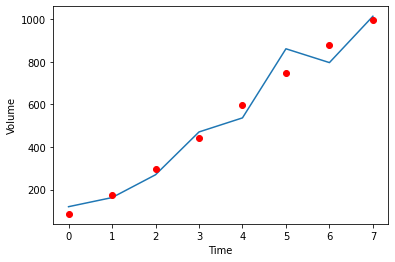

In [0]:
n1 = len(data1['Time'])
y1 = np.empty(n1)
for i in range(n1):
  y1[i] = find_volume(data1['Time'][i],c1[0],c1[1],c1[2])

plt.plot(data1['Time'],data1['TumVol'])
plt.plot(data1['Time'],y1,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

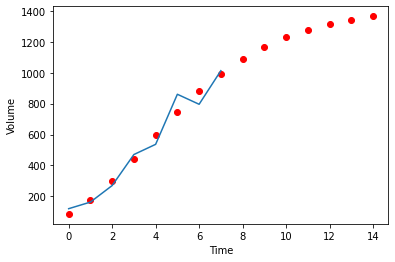

In [0]:
n1=15
time1 = np.empty(n1)
vol1 = np.empty(n1)
for i in range(n1):
  x=find_volume(i,c1[0],c1[1],c1[2])
  time1[i] = i
  vol1[i] = x

plt.plot(time1,vol1,'ro')
plt.plot(data1['Time'],data1['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

In [0]:
n = len(data1['Time'])
y1o = np.empty(n)
y1o[0] = 0
#Vinf1=1431.90
for i in range(n-1):
  #y1o[i+1]=cal_rate(1431.90,0,1,data1['TumVol'][i], data1['TumVol'][i+1])
  y1o[i+1]=cal_rate(1431.90,0,i+1,data1['TumVol'][i+1], data1['TumVol'][0])
y1o

array([  0.        ,  42.7       ,  74.85      , 116.83333333,
       104.125     , 148.12      , 112.63333333, 127.6       ])

In [0]:
y1p=np.empty(n1)
y1p[0]=0
for i in range(n1-1):
  #y1p[i+1]=cal_rate(1431.90,0,1,vol1[i],vol1[i+1])
  y1p[i+1]=cal_rate(1431.90,0,i+1,vol1[i+1],vol1[0])
y1p

array([  0.        ,  89.31761436, 106.162709  , 119.2297238 ,
       127.69916848, 131.74249103, 132.10820407, 129.74054979,
       125.53623875, 120.23239025, 114.38079898, 108.36606603,
       102.43953128,  96.75415505,  91.39414339])

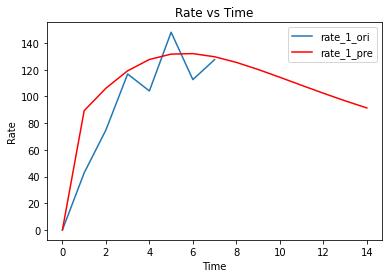

In [0]:
plt.plot(data1['Time'],y1o,label='rate_1_ori')
plt.plot(time1,y1p,'r-',label='rate_1_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()

ID: 4

In [0]:
data4 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data4 = data4[data4['id'] == 4]
data4

,Group,id,Time,TumVol
23,0,4,0,224.6
24,0,4,1,202.3
25,0,4,2,441.6
26,0,4,3,469.2
27,0,4,4,509.8
28,0,4,5,631.7
29,0,4,6,1240.5
30,0,4,7,1865.0
31,0,4,8,2201.9
32,0,4,9,3004.7


In [0]:
t4 = data4['Time'].values
vol4 = data4['TumVol'].values
g4 = [27.631,100,0.2]
c4,cov4 = curve_fit(find_volume,t4,vol4,g4,maxfev=10000)
print(c4)
print(cov4)

[1.33216963e+01 1.47214386e+02 2.86149357e-02]
[[ 4.79983916e+02  1.26295717e+03 -1.26377399e+00]
 [ 1.26295717e+03  4.23817237e+03 -3.39817222e+00]
 [-1.26377399e+00 -3.39817222e+00  3.33340191e-03]]


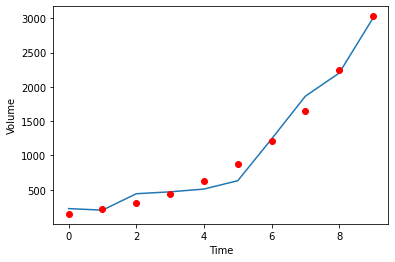

In [0]:
n4 = len(data4['Time'])
y4 = np.empty(n4)
for i in range(n4):
  y4[i] = find_volume(data4['Time'][i+23],c4[0],c4[1],c4[2])

plt.plot(data4['Time'],data4['TumVol'])
plt.plot(data4['Time'],y4,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

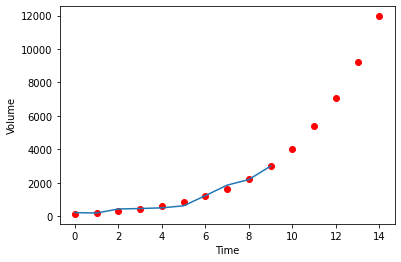

In [0]:
n4=15
time4 = np.empty(n4)
vol4 = np.empty(n4)
for i in range(n4):
  x=find_volume(i,c4[0],c4[1],c4[2])
  time4[i] = i
  vol4[i] = x

plt.plot(time4,vol4,'ro')
plt.plot(data4['Time'],data4['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

In [0]:
n = len(data4['Time'])
y4o = np.empty(n)
y4o[0] = 0
#Vinf4=89847430.6
for i in range(n-1):
  #y4o[i+1]=cal_rate(89847430.6,0,1,data4['TumVol'][i+23], data4['TumVol'][i+24])
  y4o[i+1]=cal_rate(89847430.6,0,i+1,data4['TumVol'][i+24], data4['TumVol'][23])
y4o

array([  0.        , -22.3       , 108.5       ,  81.53333333,
        71.3       ,  81.42      , 169.31666667, 234.34285714,
       247.1625    , 308.9       ])

In [0]:
y4p=np.empty(n4)
y4p[0]=0
for i in range(n4-1):
  #y4p[i+1]=cal_rate(89847430.6,0,1,vol4[i],vol4[i+1])
  y4p[i+1]=cal_rate(89847430.6,0,i+1,vol4[i+1],vol4[0])
y4p

array([  0.        ,  67.15209277,  80.82204875,  97.74232925,
       118.65287845, 144.43898257, 176.15276168, 215.03617581,
       262.54530783, 320.37561046, 390.48772989, 475.13344611,
       576.8812026 , 698.64064032, 843.6855037 ])

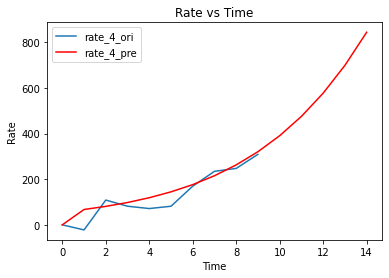

In [0]:
plt.plot(data4['Time'],y4o,label='rate_4_ori')
plt.plot(time4,y4p,'r-',label='rate_4_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()

ID: 9

In [0]:
data9 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data9 = data9[data9['id'] == 9]
data9

,Group,id,Time,TumVol
68,1,9,0,141.5
69,1,9,1,204.4
70,1,9,2,248.7
71,1,9,3,242.5
72,1,9,4,477.9
73,1,9,5,864.2
74,1,9,6,961.1
75,1,9,7,912.1
76,1,9,8,1929.0
77,1,9,9,2164.3


In [0]:
t9 = data9['Time'].values
vol9 = data9['TumVol'].values
g9 = [27.631,100,0.2]
c9,cov9 = curve_fit(find_volume,t9,vol9,g9,maxfev=10000)
print(c9)
print(cov9)

[1.31817946e+01 1.24926359e+02 2.73941730e-02]
[[ 1.50385118e+03  2.94543359e+03 -3.78383020e+00]
 [ 2.94543359e+03  7.48483987e+03 -7.57275625e+00]
 [-3.78383020e+00 -7.57275625e+00  9.53614800e-03]]


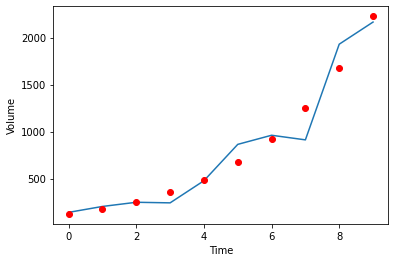

In [0]:
n9 = len(data9['Time'])
y9 = np.empty(n9)
for i in range(n9):
  y9[i] = find_volume(data9['Time'][i+68],c9[0],c9[1],c9[2])

plt.plot(data9['Time'],data9['TumVol'])
plt.plot(data9['Time'],y9,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()
#8.85982778e+00,1.06954886e+02,4.87629825e-02

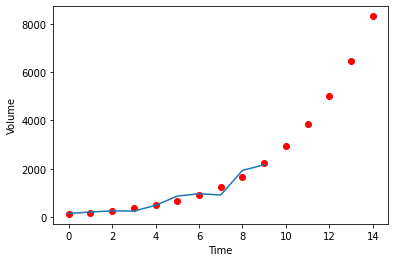

In [0]:
n9=15
time9 = np.empty(n9)
vol9 = np.empty(n9)
for i in range(n9):
  x=find_volume(i,c9[0],c9[1],c9[2])
  time9[i] = i
  vol9[i] = x

plt.plot(time9,vol9,'ro')
plt.plot(data9['Time'],data9['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

In [0]:
n = len(data9['Time'])
y9o = np.empty(n)
y9o[0] = 0
#Vinf9=753312.10
for i in range(n-1):
  #y9o[i+1]=cal_rate(753312.10,0,1,data9['TumVol'][i+68], data9['TumVol'][i+69])
  y9o[i+1]=cal_rate(753312.10,0,i+1,data9['TumVol'][i+69], data9['TumVol'][68])
y9o

array([  0.        ,  62.9       ,  53.6       ,  33.66666667,
        84.1       , 144.54      , 136.6       , 110.08571429,
       223.4375    , 224.75555556])

In [0]:
y9p=np.empty(n9)
y9p[0]=0
for i in range(n9-1):
  #y9p[i+1]=cal_rate(5037.467,0,1,vol9[i],vol9[i+1])
  y9p[i+1]=cal_rate(5037.467,0,i+1,vol9[i+1],vol9[0])
y9p

array([  0.        ,  53.455687  ,  63.67249231,  76.1716703 ,
        91.44153918, 110.0605061 , 132.70953197, 160.1853928 ,
       193.41460545, 233.46784804, 281.57466779, 339.13823337,
       407.74985526, 489.20296887, 585.50625155])

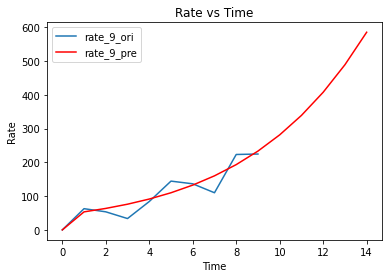

In [0]:
plt.plot(data9['Time'],y9o,label='rate_9_ori')
plt.plot(time9,y9p,'r-',label='rate_9_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()

ID: 10

In [0]:
data10 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data10 = data10[data10['id'] == 10]
data10

,Group,id,Time,TumVol
78,1,10,0,155.2
79,1,10,1,176.3
80,1,10,2,244.6
81,1,10,3,356.5
82,1,10,4,546.2
83,1,10,5,520.6
84,1,10,6,669.3


In [0]:
t10 = data10['Time'].values
vol10 = data10['TumVol'].values
g10 = [27.631,100,0.5]
c10,cov10 = curve_fit(find_volume,t10,vol10,g10)
print(c10)
print(cov10)

[  2.3402524  124.18102743   0.20970102]
[[ 3.57934343e-01  8.04189773e+00 -7.27137643e-02]
 [ 8.04189773e+00  1.54745712e+03 -4.43541041e+00]
 [-7.27137643e-02 -4.43541041e+00  2.06573792e-02]]


Text(0, 0.5, 'Volume')

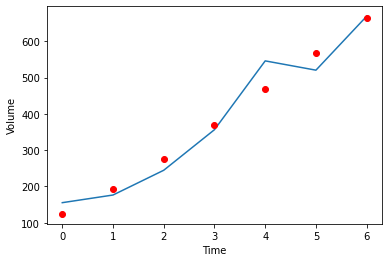

In [0]:
n10 = len(data10['Time'])
y10 = np.empty(n10)
for i in range(n10):
  y10[i] = find_volume(data10['Time'][i+78],c10[0],c10[1],c10[2])

plt.plot(data10['Time'],data10['TumVol'])
plt.plot(data10['Time'],y10,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')

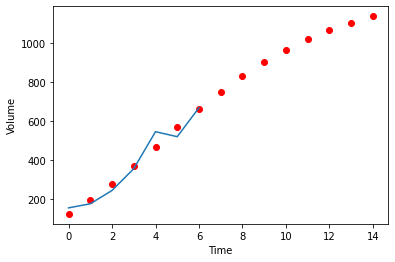

In [0]:
n10=15
time10 = np.empty(n10)
vol10 = np.empty(n10)
for i in range(n10):
  x=find_volume(i,c10[0],c10[1],c10[2])
  time10[i] = i
  vol10[i] = x

plt.plot(time10,vol10,'ro')
plt.plot(data10['Time'],data10['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

In [0]:
n = len(data10['Time'])
y10o = np.empty(n)
y10o[0] = 0
#Vinf10=1289.478
for i in range(n-1):
  #y10o[i+1]=cal_rate(1289.478,0,1,data10['TumVol'][i+78], data10['TumVol'][i+79])
  y10o[i+1]=cal_rate(1289.478,0,i+1,data10['TumVol'][i+79], data10['TumVol'][78])
y10o

array([ 0.        , 21.1       , 44.7       , 67.1       , 97.75      ,
       73.08      , 85.68333333])

In [0]:
y10p=np.empty(n10)
y10p[0]=0
for i in range(n10-1):
  #y10p[i+1]=cal_rate(1289.478,0,1,vol10[i],vol10[i+1])
  y10p[i+1]=cal_rate(1289.478,0,i+1,vol10[i+1],vol10[0])
y10p

array([ 0.        , 69.15965476, 76.32643279, 82.05960762, 86.18943791,
       88.73012385, 89.82569497, 89.69331108, 88.57660646, 86.71333594,
       84.31644968, 81.56551609, 78.60506532, 75.54696808, 72.47476484])

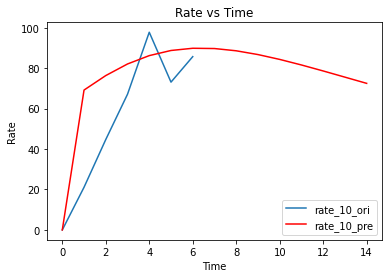

In [0]:
plt.plot(data10['Time'],y10o,label='rate_10_ori')
plt.plot(time10,y10p,'r-',label='rate_10_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()

ID: 25

In [0]:
data25 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data25 = data25[data25['id'] == 25]
data25

,Group,id,Time,TumVol
218,3,25,0,96.1
219,3,25,1,177.5
220,3,25,2,136.2
221,3,25,3,203.0
222,3,25,4,221.4
223,3,25,5,314.6
224,3,25,6,386.7
225,3,25,7,634.0
226,3,25,8,576.5
227,3,25,9,898.9


In [0]:
t25 = data25['Time'].values
vol25 = data25['TumVol'].values
g25 = [27.631,100,0.2]
c25,cov25 = curve_fit(find_volume,t25,vol25,g25)
print(c25)
print(cov25)

[ 4.17800734 77.21945651  0.08898283]
[[ 2.92389659e+00  4.67591912e+01 -1.30891341e-01]
 [ 4.67591912e+01  1.56668286e+03 -2.74564398e+00]
 [-1.30891341e-01 -2.74564398e+00  6.38798536e-03]]


Text(0, 0.5, 'Volume')

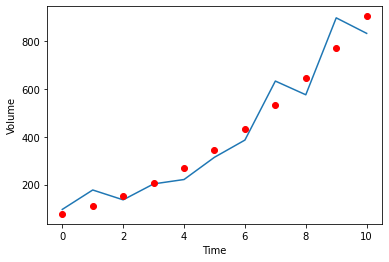

In [0]:
n25 = len(data25['Time'])
y25 = np.empty(n25)
for i in range(n25):
  y25[i] = find_volume(data25['Time'][i+218],c25[0],c25[1],c25[2])

plt.plot(data25['Time'],data25['TumVol'])
plt.plot(data25['Time'],y25,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')

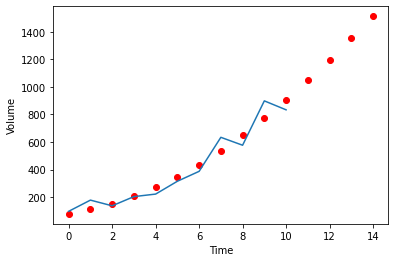

In [0]:
n25=15
time25 = np.empty(n25)
vol25 = np.empty(n25)
for i in range(n25):
  x=find_volume(i,c25[0],c25[1],c25[2])
  time25[i] = i
  vol25[i] = x

plt.plot(time25,vol25,'ro')
plt.plot(data25['Time'],data25['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

In [0]:
n = len(data25['Time'])
y25o = np.empty(n)
y25o[0] = 0
#Vinf25=5037.467
for i in range(n-1):
  #y25o[i+1]=cal_rate(5037.467,0,1,data25['TumVol'][i+218], data25['TumVol'][i+219])
  y25o[i+1]=cal_rate(5037.467,0,i+1,data25['TumVol'][i+219], data25['TumVol'][218])
y25o

array([ 0.        , 81.4       , 20.05      , 35.63333333, 31.325     ,
       43.7       , 48.43333333, 76.84285714, 60.05      , 89.2       ,
       73.78      ])

In [0]:
y25p=np.empty(n25)
y25p[0]=0
for i in range(n25-1):
  #y25p[i+1]=cal_rate(5037.467,0,1,vol25[i],vol25[i+1])
  y25p[i+1]=cal_rate(5037.467,0,i+1,vol25[i+1],vol25[0])
y25p

array([  0.        ,  32.98767736,  37.68775248,  42.76430706,
        48.15842867,  53.79913557,  59.60701152,  65.49812312,
        71.38787152,  77.19449346,  82.8420087 ,  88.26249747,
        93.39767037,  98.19975691, 102.63178501])

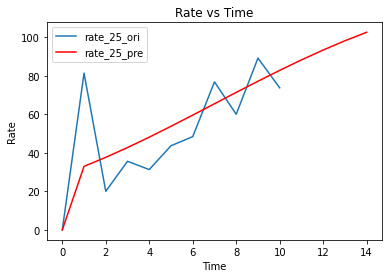

In [0]:
plt.plot(data25['Time'],y25o,label='rate_25_ori')
plt.plot(time25,y25p,'r-',label='rate_25_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()

Comparison of rate vs time for different ID's

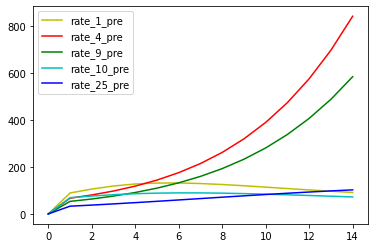

In [0]:
plt.plot(time1,y1p,'y-',label='rate_1_pre')
plt.plot(time4,y4p,'r-',label='rate_4_pre')
plt.plot(time9,y9p,'g-',label='rate_9_pre')
plt.plot(time10,y10p,'c-',label='rate_10_pre')
plt.plot(time25,y25p,'b-',label='rate_25_pre')
plt.legend()
plt.show()

In [0]:
'''RMSE
age & weight
'''

'RMSE\nage & weight\n'

RMSE Calculation

In [0]:

def rmse(yp,yo):
  n=len(yo)
  r=0;
  for i in range(n):
    r+=(yp[i]-yo[i])*(yp[i]-yo[i])
  return (math.sqrt(r/n))

'''
def rmse_vol(yp,yo):
  n=len(yo)
  return (np.sqrt((np.square(abs(np.subtract(yp,yo)))).sum()/n))
'''

'\ndef rmse_vol(yp,yo):\n  n=len(yo)\n  return (np.sqrt((np.square(abs(np.subtract(yp,yo)))).sum()/n))\n'

In [0]:
r1 = rmse(y1p,y1o)
print("RMSE of rates of ID: 1 ",r1)
r4 = rmse(y4p,y4o)
print("RMSE of rates of ID: 4 ",r4)
r9 = rmse(y9p,y9o)
print("RMSE of rates of ID: 9 ",r9)
r10 = rmse(y10p,y10o)
print("RMSE of rates of ID: 10 ",r10)
r25 = rmse(y25p,y25o)
print("RMSE of rates of ID: 25 ",r25)

print("")

rv1 = rmse(y1,data1['TumVol'].values)
print("RMSE of vols of ID: 1 ",rv1)
rv4 = rmse(y4,data4['TumVol'].values)
print("RMSE of vols of ID: 4 ",rv4)
rv9 = rmse(y9,data9['TumVol'].values)
print("RMSE of vols of ID: 9 ",rv9)
rv10 = rmse(y10,data10['TumVol'].values)
print("RMSE of vols of ID: 10 ",rv10)
rv25 = rmse(y25,data25['TumVol'].values)
print("RMSE of vols of ID: 25 ",rv25)

RMSE of rates of ID: 1  23.36462915382115
RMSE of rates of ID: 4  40.03993662176902
RMSE of rates of ID: 9  25.966229888845554
RMSE of rates of ID: 10  23.69292739291163
RMSE of rates of ID: 25  18.33874323050031

RMSE of vols of ID: 1  58.24741896155075
RMSE of vols of ID: 4  119.53520637171384
RMSE of vols of ID: 9  152.35688365590195
RMSE of vols of ID: 10  39.13677539575531
RMSE of vols of ID: 25  65.29972345806111


Describe Stats of Volume and Rate

In [0]:
#For each numpy
#from scipy import stats
#stats.describe(y1)

#----------using dataframe--------

# ID: 1

df1 = pd.DataFrame(data=data1['TumVol'].values,columns=['Actual_volume'])
df1['Predicted_volume'] = y1
df1['Actual_rate'] = y1o
n1=len(y1o)
y1pre = y1p[:n1]
df1['Predicted_rate'] = y1pre

df1.describe()

,Actual_volume,Predicted_volume,Actual_rate,Predicted_rate
count,8.000000,8.000000,8.000000,8.000000
mean,528.725000,527.427457,90.857708,104.500058
std,335.465773,332.003038,48.967092,44.801367
min,120.100000,86.218157,0.000000,0.000000
25%,243.050000,267.791624,66.812500,101.951435
50%,503.600000,520.461079,108.379167,123.464446
75%,812.100000,778.414804,119.525000,130.241035
max,1013.300000,994.402005,148.120000,132.108204


In [0]:
# ID: 4
df4 = pd.DataFrame(data=data4['TumVol'].values,columns=['Actual_volume'])
df4['Predicted_volume'] = y4
df4['Actual_rate'] = y4o
n4=len(y4o)
y4pre = y4p[:n4]
df4['Predicted_rate'] = y4pre

df4.describe()

,Actual_volume,Predicted_volume,Actual_rate,Predicted_rate
count,10.000000,10.000000,10.000000,10.000000
mean,1079.130000,1073.688622,128.017536,148.291819
std,966.891121,965.410807,108.953841,96.880558
min,202.300000,147.214386,-22.300000,0.000000
25%,448.500000,341.754206,73.830000,85.052119
50%,570.750000,745.617599,95.016667,131.545931
75%,1708.875000,1540.383451,218.086310,205.315322
max,3004.700000,3030.594880,308.900000,320.375610


In [0]:
# ID: 9
df9 = pd.DataFrame(data=data9['TumVol'].values,columns=['Actual_volume'])
df9['Predicted_volume'] = y9
df9['Actual_rate'] = y9o
n9=len(y9o)
y9pre = y9p[:n9]
df9['Predicted_rate'] = y9pre

df9.describe()

,Actual_volume,Predicted_volume,Actual_rate,Predicted_rate
count,10.000000,10.000000,10.000000,10.000000
mean,814.570000,814.073038,107.368544,111.457927
std,721.366131,703.900985,75.913105,70.037784
min,141.500000,124.926359,0.000000,0.000000
25%,244.050000,277.563850,55.925000,66.797287
50%,671.050000,582.960702,97.092857,100.751023
75%,948.850000,1164.963969,142.555000,153.316428
max,2164.300000,2226.136991,224.755556,233.467848


In [0]:
#------- With the above representation of comparison, 
#------- we can easily compare the average, min, max, values 
#------- between actual data values and the predicted data values

26/04/2020 Graph for all id's

ID: 2

[7.24965254e+03 1.22640892e+02 4.84478309e-05]
[[ 3.71917900e+15  7.68698459e+09 -2.48595985e+07]
 [ 7.68698459e+09  2.01840307e+04 -5.13818212e+01]
 [-2.48595985e+07 -5.13818212e+01  1.66165608e-01]]


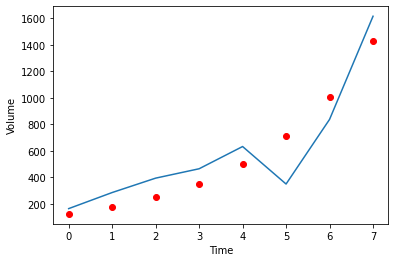

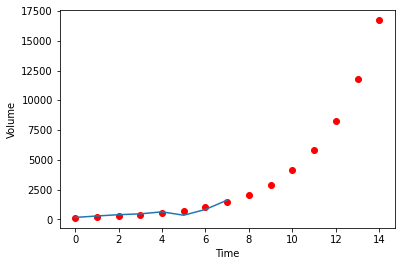

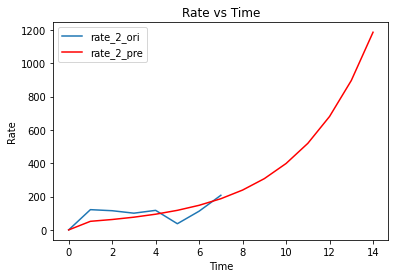

In [0]:
data2 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data2 = data2[data2['id'] == 2]
data2


t2 = data2['Time'].values
vol2 = data2['TumVol'].values
g2 = [27.631,100,0.2]
c2,cov2 = curve_fit(find_volume,t2,vol2,g2,maxfev=10000)
print(c2)
print(cov2)


n2 = len(data2['Time'])
y2 = np.empty(n2)
for i in range(n2):
  y2[i] = find_volume(data2['Time'][i+8],c2[0],c2[1],c2[2])

plt.plot(data2['Time'],data2['TumVol'])
plt.plot(data2['Time'],y2,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n2=15
time2 = np.empty(n2)
vol2 = np.empty(n2)
for i in range(n2):
  x=find_volume(i,c2[0],c2[1],c2[2])
  time2[i] = i
  vol2[i] = x

plt.plot(time2,vol2,'ro')
plt.plot(data2['Time'],data2['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data2['Time'])
y2o = np.empty(n)
y2o[0] = 0
#Vinf2=5037.467
for i in range(n-1):
  #y2o[i+1]=cal_rate(5037.467,0,1,data2['TumVol'][i+8], data2['TumVol'][i+9])
  y2o[i+1]=cal_rate(5037.467,0,i+1,data2['TumVol'][i+9], data2['TumVol'][8])
y2o


y2p=np.empty(n2)
y2p[0]=0
for i in range(n2-1):
  #y2p[i+1]=cal_rate(5037.467,0,1,vol2[i],vol2[i+1])
  y2p[i+1]=cal_rate(5037.467,0,i+1,vol2[i+1],vol2[0])
y2p


plt.plot(data2['Time'],y2o,label='rate_2_ori')
plt.plot(time2,y2p,'r-',label='rate_2_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 3

[9.31535104e+00 1.56989218e+02 2.86172877e-02]
[[ 2.10310493e+03  1.48348913e+03 -7.20114336e+00]
 [ 1.48348913e+03  1.79492330e+03 -5.19622719e+00]
 [-7.20114336e+00 -5.19622719e+00  2.46770478e-02]]


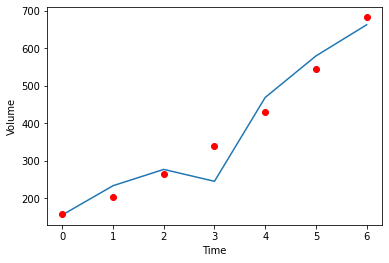

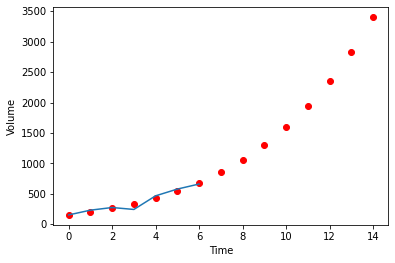

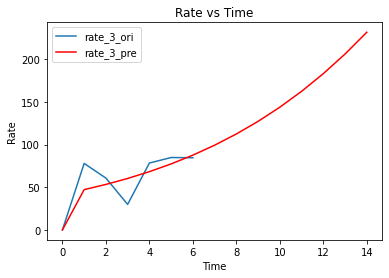

In [0]:
data3 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data3 = data3[data3['id'] == 3]
data3


t3 = data3['Time'].values
vol3 = data3['TumVol'].values
g3 = [27.631,100,0.2]
c3,cov3 = curve_fit(find_volume,t3,vol3,g3)
print(c3)
print(cov3)


n3 = len(data3['Time'])
y3 = np.empty(n3)
for i in range(n3):
  y3[i] = find_volume(data3['Time'][i+16],c3[0],c3[1],c3[2])

plt.plot(data3['Time'],data3['TumVol'])
plt.plot(data3['Time'],y3,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n3=15
time3 = np.empty(n3)
vol3 = np.empty(n3)
for i in range(n3):
  x=find_volume(i,c3[0],c3[1],c3[2])
  time3[i] = i
  vol3[i] = x

plt.plot(time3,vol3,'ro')
plt.plot(data3['Time'],data3['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data3['Time'])
y3o = np.empty(n)
y3o[0] = 0
#Vinf3=5037.467
for i in range(n-1):
  #y3o[i+1]=cal_rate(5037.467,0,1,data3['TumVol'][i+16], data3['TumVol'][i+17])
  y3o[i+1]=cal_rate(5037.467,0,i+1,data3['TumVol'][i+17], data3['TumVol'][16])
y3o


y3p=np.empty(n3)
y3p[0]=0
for i in range(n3-1):
  #y3p[i+1]=cal_rate(5037.467,0,1,vol3[i],vol3[i+1])
  y3p[i+1]=cal_rate(5037.467,0,i+1,vol3[i+1],vol3[0])
y3p


plt.plot(data3['Time'],y3o,label='rate_3_ori')
plt.plot(time3,y3p,'r-',label='rate_3_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 5

[9.40921789e+03 1.01785205e+02 4.25147083e-05]
[[ 2.84523714e+15  5.00703439e+09 -1.28585434e+07]
 [ 5.00703439e+09  1.30022629e+04 -2.26290835e+01]
 [-1.28585434e+07 -2.26290835e+01  5.81119004e-02]]


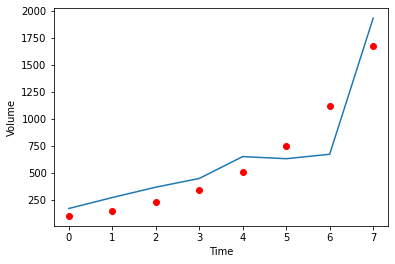

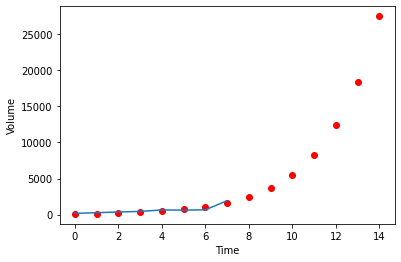

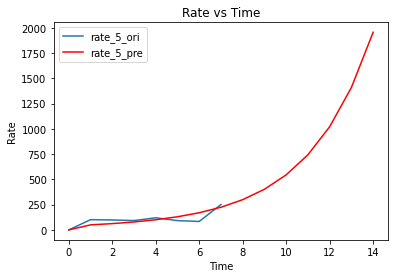

In [0]:
data5 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data5 = data5[data5['id'] == 5]
data5


t5 = data5['Time'].values
vol5 = data5['TumVol'].values
g5 = [27.631,100,0.2]
c5,cov5 = curve_fit(find_volume,t5,vol5,g5,maxfev=10000)
print(c5)
print(cov5)


n5 = len(data5['Time'])
y5 = np.empty(n5)
for i in range(n5):
  y5[i] = find_volume(data5['Time'][i+33],c5[0],c5[1],c5[2])

plt.plot(data5['Time'],data5['TumVol'])
plt.plot(data5['Time'],y5,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n5=15
time5 = np.empty(n5)
vol5 = np.empty(n5)
for i in range(n5):
  x=find_volume(i,c5[0],c5[1],c5[2])
  time5[i] = i
  vol5[i] = x

plt.plot(time5,vol5,'ro')
plt.plot(data5['Time'],data5['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data5['Time'])
y5o = np.empty(n)
y5o[0] = 0
#Vinf5=5037.467
for i in range(n-1):
  #y5o[i+1]=cal_rate(5037.467,0,1,data5['TumVol'][i+33], data5['TumVol'][i+34])
  y5o[i+1]=cal_rate(5037.467,0,i+1,data5['TumVol'][i+34], data5['TumVol'][33])
y5o


y5p=np.empty(n5)
y5p[0]=0
for i in range(n5-1):
  #y5p[i+1]=cal_rate(5037.467,0,1,vol5[i],vol5[i+1])
  y5p[i+1]=cal_rate(5037.467,0,i+1,vol5[i+1],vol5[0])
y5p


plt.plot(data5['Time'],y5o,label='rate_5_ori')
plt.plot(time5,y5p,'r-',label='rate_5_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 6

[5.57245809e+03 8.46706730e+01 7.57187842e-05]
[[ 5.31132821e+13  4.59105145e+08 -7.22045103e+05]
 [ 4.59105145e+08  4.85046284e+03 -6.24152727e+00]
 [-7.22045103e+05 -6.24152727e+00  9.81579585e-03]]


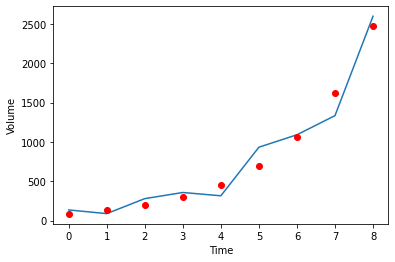

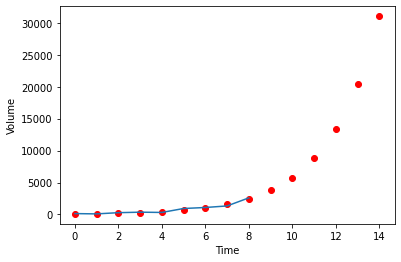

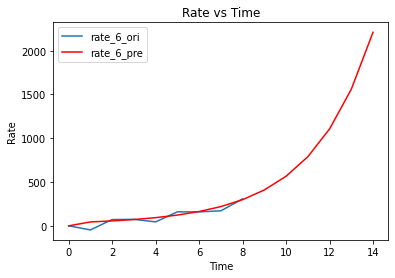

In [0]:
data6 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data6 = data6[data6['id'] == 6]
data6


t6 = data6['Time'].values
vol6 = data6['TumVol'].values
g6 = [27.631,100,0.2]
c6,cov6 = curve_fit(find_volume,t6,vol6,g6,maxfev=10000)
print(c6)
print(cov6)


n6 = len(data6['Time'])
y6 = np.empty(n6)
for i in range(n6):
  y6[i] = find_volume(data6['Time'][i+41],c6[0],c6[1],c6[2])

plt.plot(data6['Time'],data6['TumVol'])
plt.plot(data6['Time'],y6,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n6=15
time6 = np.empty(n6)
vol6 = np.empty(n6)
for i in range(n6):
  x=find_volume(i,c6[0],c6[1],c6[2])
  time6[i] = i
  vol6[i] = x

plt.plot(time6,vol6,'ro')
plt.plot(data6['Time'],data6['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data6['Time'])
y6o = np.empty(n)
y6o[0] = 0
#Vinf6=5037.467
for i in range(n-1):
  #y6o[i+1]=cal_rate(5037.467,0,1,data6['TumVol'][i+41], data6['TumVol'][i+42])
  y6o[i+1]=cal_rate(5037.467,0,i+1,data6['TumVol'][i+42], data6['TumVol'][41])
y6o


y6p=np.empty(n6)
y6p[0]=0
for i in range(n6-1):
  #y6p[i+1]=cal_rate(5037.467,0,1,vol6[i],vol6[i+1])
  y6p[i+1]=cal_rate(5037.467,0,i+1,vol6[i+1],vol6[0])
y6p


plt.plot(data6['Time'],y6o,label='rate_6_ori')
plt.plot(time6,y6p,'r-',label='rate_6_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 7

[4.41351944e+03 1.16478841e+02 6.85192271e-05]
[[ 6.59873654e+13  2.38815575e+08 -1.02487561e+06]
 [ 2.38815575e+08  1.23816193e+03 -3.70927571e+00]
 [-1.02487561e+06 -3.70927571e+00  1.59177445e-02]]


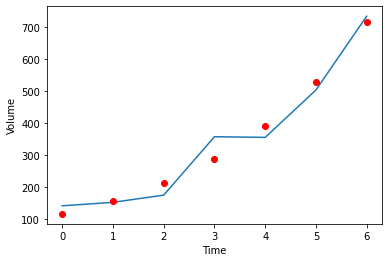

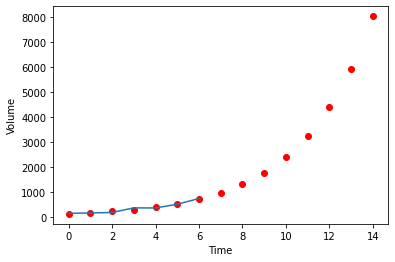

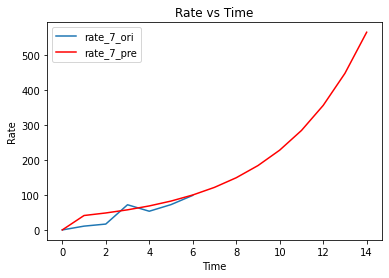

In [0]:
data7 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data7 = data7[data7['id'] == 7]
data7


t7 = data7['Time'].values
vol7 = data7['TumVol'].values
g7 = [27.631,100,0.2]
c7,cov7 = curve_fit(find_volume,t7,vol7,g7,maxfev=10000)
print(c7)
print(cov7)


n7 = len(data7['Time'])
y7 = np.empty(n7)
for i in range(n7):
  y7[i] = find_volume(data7['Time'][i+50],c7[0],c7[1],c7[2])

plt.plot(data7['Time'],data7['TumVol'])
plt.plot(data7['Time'],y7,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n7=15
time7 = np.empty(n7)
vol7 = np.empty(n7)
for i in range(n7):
  x=find_volume(i,c7[0],c7[1],c7[2])
  time7[i] = i
  vol7[i] = x

plt.plot(time7,vol7,'ro')
plt.plot(data7['Time'],data7['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data7['Time'])
y7o = np.empty(n)
y7o[0] = 0
#Vinf7=5037.467
for i in range(n-1):
  #y7o[i+1]=cal_rate(5037.467,0,1,data7['TumVol'][i+50], data7['TumVol'][i+51])
  y7o[i+1]=cal_rate(5037.467,0,i+1,data7['TumVol'][i+51], data7['TumVol'][50])
y7o


y7p=np.empty(n7)
y7p[0]=0
for i in range(n7-1):
  #y7p[i+1]=cal_rate(5037.467,0,1,vol7[i],vol7[i+1])
  y7p[i+1]=cal_rate(5037.467,0,i+1,vol7[i+1],vol7[0])
y7p


plt.plot(data7['Time'],y7o,label='rate_7_ori')
plt.plot(time7,y7p,'r-',label='rate_7_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 8

[1.02000696e+04 9.05098202e+01 3.37202817e-05]
[[ 1.87013674e+14  4.19207117e+08 -6.18388630e+05]
 [ 4.19207117e+08  1.44386043e+03 -1.38623020e+00]
 [-6.18388630e+05 -1.38623019e+00  2.04479432e-03]]


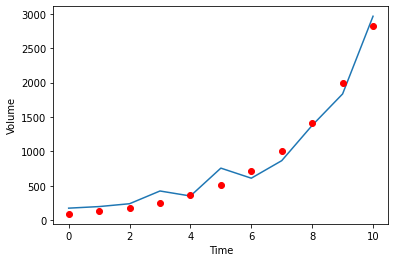

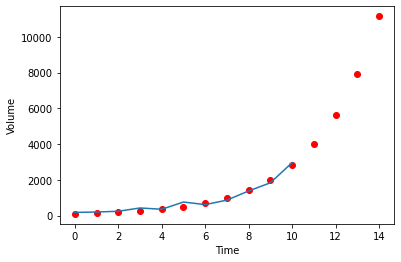

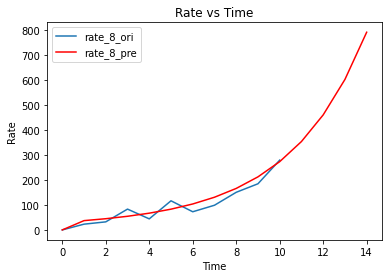

In [0]:
data8 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data8 = data8[data8['id'] == 8]
data8


t8 = data8['Time'].values
vol8 = data8['TumVol'].values
g8 = [27.631,100,0.2]
c8,cov8 = curve_fit(find_volume,t8,vol8,g8,maxfev=10000)
print(c8)
print(cov8)


n8 = len(data8['Time'])
y8 = np.empty(n8)
for i in range(n8):
  y8[i] = find_volume(data8['Time'][i+57],c8[0],c8[1],c8[2])

plt.plot(data8['Time'],data8['TumVol'])
plt.plot(data8['Time'],y8,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n8=15
time8 = np.empty(n8)
vol8 = np.empty(n8)
for i in range(n8):
  x=find_volume(i,c8[0],c8[1],c8[2])
  time8[i] = i
  vol8[i] = x

plt.plot(time8,vol8,'ro')
plt.plot(data8['Time'],data8['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data8['Time'])
y8o = np.empty(n)
y8o[0] = 0
#Vinf8=5037.467
for i in range(n-1):
  #y8o[i+1]=cal_rate(5037.467,0,1,data8['TumVol'][i+57], data8['TumVol'][i+58])
  y8o[i+1]=cal_rate(5037.467,0,i+1,data8['TumVol'][i+58], data8['TumVol'][57])
y8o


y8p=np.empty(n8)
y8p[0]=0
for i in range(n8-1):
  #y8p[i+1]=cal_rate(5037.467,0,1,vol8[i],vol8[i+1])
  y8p[i+1]=cal_rate(5037.467,0,i+1,vol8[i+1],vol8[0])
y8p


plt.plot(data8['Time'],y8o,label='rate_8_ori')
plt.plot(time8,y8p,'r-',label='rate_8_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 11

[ 3.25316131 54.66054749  0.30245707]
[[ 4.90248125e+00 -3.12594648e+02  5.62217164e-01]
 [-3.12594648e+02  2.09635745e+04 -4.24958204e+01]
 [ 5.62217164e-01 -4.24958204e+01  1.09884786e-01]]


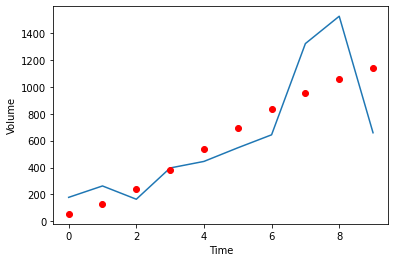

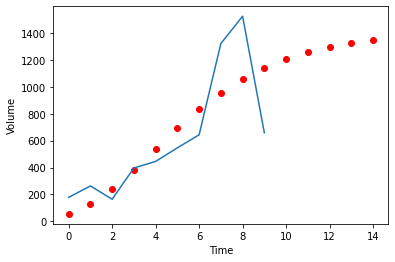

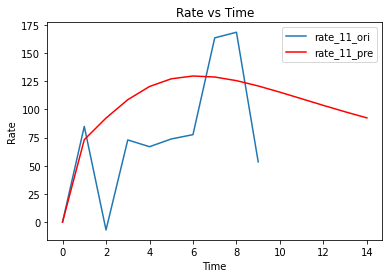

In [0]:
data11 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data11 = data11[data11['id'] == 11]
data11


t11 = data11['Time'].values
vol11 = data11['TumVol'].values
g11 = [27.631,100,1]
c11,cov11 = curve_fit(find_volume,t11,vol11,g11,maxfev=10000)
print(c11)
print(cov11)


n11 = len(data11['Time'])
y11 = np.empty(n11)
for i in range(n11):
  y11[i] = find_volume(data11['Time'][i+85],c11[0],c11[1],c11[2])

plt.plot(data11['Time'],data11['TumVol'])
plt.plot(data11['Time'],y11,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n11=15
time11 = np.empty(n11)
vol11 = np.empty(n11)
for i in range(n11):
  x=find_volume(i,c11[0],c11[1],c11[2])
  time11[i] = i
  vol11[i] = x

plt.plot(time11,vol11,'ro')
plt.plot(data11['Time'],data11['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data11['Time'])
y11o = np.empty(n)
y11o[0] = 0
#Vinf11=5037.467
for i in range(n-1):
  #y11o[i+1]=cal_rate(5037.467,0,1,data11['TumVol'][i+85], data11['TumVol'][i+86])
  y11o[i+1]=cal_rate(5037.467,0,i+1,data11['TumVol'][i+86], data11['TumVol'][85])
y11o


y11p=np.empty(n11)
y11p[0]=0
for i in range(n11-1):
  #y11p[i+1]=cal_rate(5037.467,0,1,vol11[i],vol11[i+1])
  y11p[i+1]=cal_rate(5037.467,0,i+1,vol11[i+1],vol11[0])
y11p


plt.plot(data11['Time'],y11o,label='rate_11_ori')
plt.plot(time11,y11p,'r-',label='rate_11_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 12

[1.04898450e+01 4.98331122e+01 4.72092994e-02]
[[ 4.49724967e+02  1.84112705e+03 -3.13718794e+00]
 [ 1.84112705e+03  9.16233690e+03 -1.33705367e+01]
 [-3.13718794e+00 -1.33705367e+01  2.20572130e-02]]


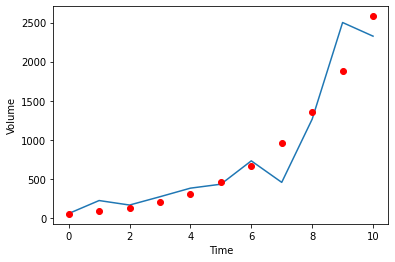

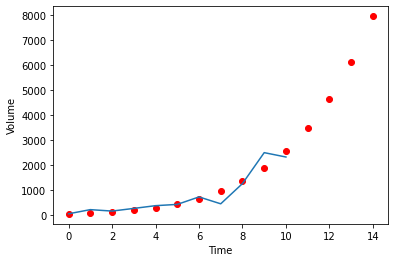

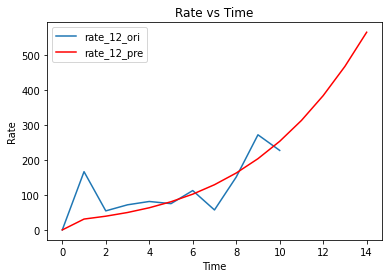

In [0]:
data12 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data12 = data12[data12['id'] == 12]
data12


t12 = data12['Time'].values
vol12 = data12['TumVol'].values
g12 = [27.631,100,0.2]
c12,cov12 = curve_fit(find_volume,t12,vol12,g12,maxfev=10000)
print(c12)
print(cov12)


n12 = len(data12['Time'])
y12 = np.empty(n12)
for i in range(n12):
  y12[i] = find_volume(data12['Time'][i+95],c12[0],c12[1],c12[2])

plt.plot(data12['Time'],data12['TumVol'])
plt.plot(data12['Time'],y12,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n12=15
time12 = np.empty(n12)
vol12 = np.empty(n12)
for i in range(n12):
  x=find_volume(i,c12[0],c12[1],c12[2])
  time12[i] = i
  vol12[i] = x

plt.plot(time12,vol12,'ro')
plt.plot(data12['Time'],data12['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data12['Time'])
y12o = np.empty(n)
y12o[0] = 0
#Vinf12=5037.467
for i in range(n-1):
  #y12o[i+1]=cal_rate(5037.467,0,1,data12['TumVol'][i+95], data12['TumVol'][i+96])
  y12o[i+1]=cal_rate(5037.467,0,i+1,data12['TumVol'][i+96], data12['TumVol'][95])
y12o


y12p=np.empty(n12)
y12p[0]=0
for i in range(n12-1):
  #y12p[i+1]=cal_rate(5037.467,0,1,vol12[i],vol12[i+1])
  y12p[i+1]=cal_rate(5037.467,0,i+1,vol12[i+1],vol12[0])
y12p


plt.plot(data12['Time'],y12o,label='rate_12_ori')
plt.plot(time12,y12p,'r-',label='rate_12_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 13

[3.99296983e+03 9.77779125e+01 7.54100611e-05]
[[ 4.64165420e+13  4.86639302e+08 -8.77033474e+05]
 [ 4.86639302e+08  6.46377991e+03 -9.19540490e+00]
 [-8.77033474e+05 -9.19540490e+00  1.65714137e-02]]


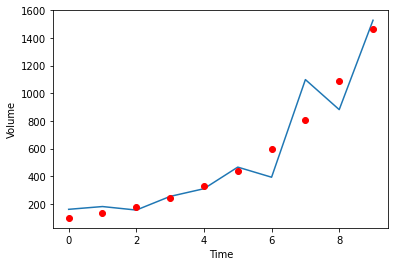

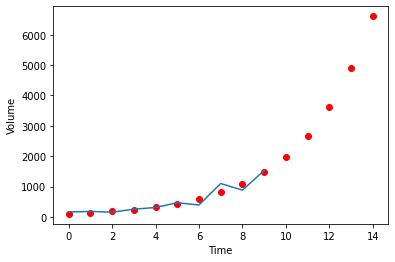

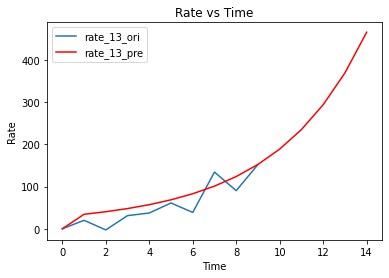

In [0]:
data13 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data13 = data13[data13['id'] == 13]
data13


t13 = data13['Time'].values
vol13 = data13['TumVol'].values
g13 = [27.631,100,0.2]
c13,cov13 = curve_fit(find_volume,t13,vol13,g13,maxfev=10000)
print(c13)
print(cov13)


n13 = len(data13['Time'])
y13 = np.empty(n13)
for i in range(n13):
  y13[i] = find_volume(data13['Time'][i+106],c13[0],c13[1],c13[2])

plt.plot(data13['Time'],data13['TumVol'])
plt.plot(data13['Time'],y13,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n13=15
time13 = np.empty(n13)
vol13 = np.empty(n13)
for i in range(n13):
  x=find_volume(i,c13[0],c13[1],c13[2])
  time13[i] = i
  vol13[i] = x

plt.plot(time13,vol13,'ro')
plt.plot(data13['Time'],data13['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data13['Time'])
y13o = np.empty(n)
y13o[0] = 0
#Vinf13=5037.467
for i in range(n-1):
  #y13o[i+1]=cal_rate(5037.467,0,1,data13['TumVol'][i+106], data13['TumVol'][i+107])
  y13o[i+1]=cal_rate(5037.467,0,i+1,data13['TumVol'][i+107], data13['TumVol'][106])
y13o


y13p=np.empty(n13)
y13p[0]=0
for i in range(n13-1):
  #y13p[i+1]=cal_rate(5037.467,0,1,vol13[i],vol13[i+1])
  y13p[i+1]=cal_rate(5037.467,0,i+1,vol13[i+1],vol13[0])
y13p


plt.plot(data13['Time'],y13o,label='rate_13_ori')
plt.plot(time13,y13p,'r-',label='rate_13_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 14

[1.38918855e+04 3.12201525e+01 2.86075284e-05]
[[ 2.34795168e+14  1.11630099e+08 -4.83603574e+05]
 [ 1.11630099e+08  2.78109214e+02 -2.29978168e-01]
 [-4.83603574e+05 -2.29978168e-01  9.96069985e-04]]


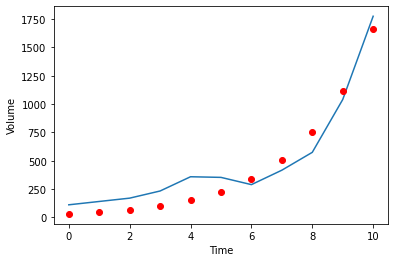

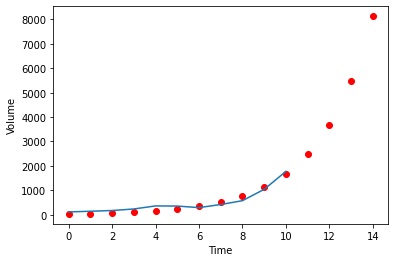

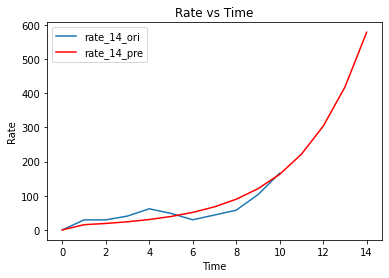

In [0]:
data14 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data14 = data14[data14['id'] == 14]
data14


t14 = data14['Time'].values
vol14 = data14['TumVol'].values
g14 = [27.631,100,0.2]
c14,cov14 = curve_fit(find_volume,t14,vol14,g14,maxfev=10000)
print(c14)
print(cov14)


n14 = len(data14['Time'])
y14 = np.empty(n14)
for i in range(n14):
  y14[i] = find_volume(data14['Time'][i+116],c14[0],c14[1],c14[2])

plt.plot(data14['Time'],data14['TumVol'])
plt.plot(data14['Time'],y14,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n14=15
time14 = np.empty(n14)
vol14 = np.empty(n14)
for i in range(n14):
  x=find_volume(i,c14[0],c14[1],c14[2])
  time14[i] = i
  vol14[i] = x

plt.plot(time14,vol14,'ro')
plt.plot(data14['Time'],data14['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data14['Time'])
y14o = np.empty(n)
y14o[0] = 0
#Vinf14=5037.467
for i in range(n-1):
  #y14o[i+1]=cal_rate(5037.467,0,1,data14['TumVol'][i+116], data14['TumVol'][i+117])
  y14o[i+1]=cal_rate(5037.467,0,i+1,data14['TumVol'][i+117], data14['TumVol'][116])
y14o


y14p=np.empty(n14)
y14p[0]=0
for i in range(n14-1):
  #y14p[i+1]=cal_rate(5037.467,0,1,vol14[i],vol14[i+1])
  y14p[i+1]=cal_rate(5037.467,0,i+1,vol14[i+1],vol14[0])
y14p


plt.plot(data14['Time'],y14o,label='rate_14_ori')
plt.plot(time14,y14p,'r-',label='rate_14_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 15

[4.96407331e+03 1.23174467e+02 5.34646787e-05]
[[ 4.46555251e+13  2.27355655e+08 -4.81134146e+05]
 [ 2.27355655e+08  1.72188280e+03 -2.44973953e+00]
 [-4.81134146e+05 -2.44973953e+00  5.18390652e-03]]


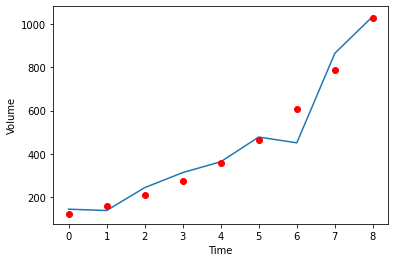

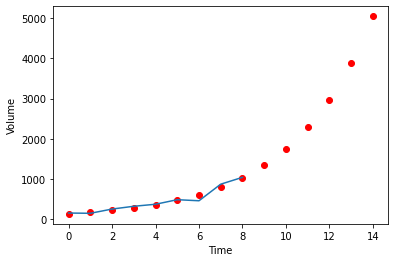

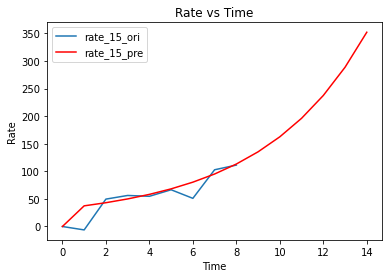

In [0]:
data15 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data15 = data15[data15['id'] == 15]
data15


t15 = data15['Time'].values
vol15 = data15['TumVol'].values
g15 = [27.631,100,0.2]
c15,cov15 = curve_fit(find_volume,t15,vol15,g15,maxfev=10000)
print(c15)
print(cov15)


n15 = len(data15['Time'])
y15 = np.empty(n15)
for i in range(n15):
  y15[i] = find_volume(data15['Time'][i+127],c15[0],c15[1],c15[2])

plt.plot(data15['Time'],data15['TumVol'])
plt.plot(data15['Time'],y15,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n15=15
time15 = np.empty(n15)
vol15 = np.empty(n15)
for i in range(n15):
  x=find_volume(i,c15[0],c15[1],c15[2])
  time15[i] = i
  vol15[i] = x

plt.plot(time15,vol15,'ro')
plt.plot(data15['Time'],data15['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data15['Time'])
y15o = np.empty(n)
y15o[0] = 0
#Vinf15=5037.467
for i in range(n-1):
  #y15o[i+1]=cal_rate(5037.467,0,1,data15['TumVol'][i+127], data15['TumVol'][i+128])
  y15o[i+1]=cal_rate(5037.467,0,i+1,data15['TumVol'][i+128], data15['TumVol'][127])
y15o


y15p=np.empty(n15)
y15p[0]=0
for i in range(n15-1):
  #y15p[i+1]=cal_rate(5037.467,0,1,vol15[i],vol15[i+1])
  y15p[i+1]=cal_rate(5037.467,0,i+1,vol15[i+1],vol15[0])
y15p


plt.plot(data15['Time'],y15o,label='rate_15_ori')
plt.plot(time15,y15p,'r-',label='rate_15_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 16

[ 3.67770372 62.11205274  0.18172915]
[[ 1.59911423e-01 -7.87481196e+00  1.59247317e-03]
 [-7.87481196e+00  1.60483602e+03 -2.91851980e+00]
 [ 1.59247317e-03 -2.91851980e+00  6.67859833e-03]]


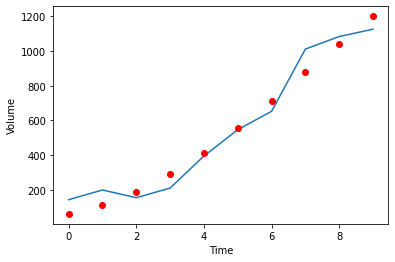

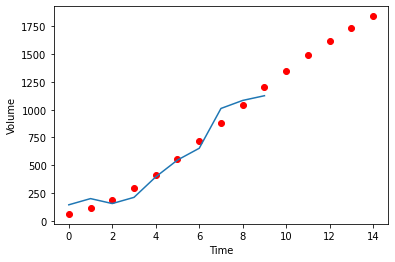

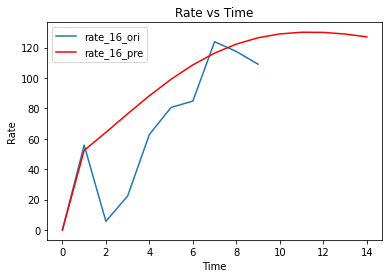

In [0]:
data16 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data16 = data16[data16['id'] == 16]
data16


t16 = data16['Time'].values
vol16 = data16['TumVol'].values
g16 = [27.631,100,0.2]
c16,cov16 = curve_fit(find_volume,t16,vol16,g16,maxfev=10000)
print(c16)
print(cov16)


n16 = len(data16['Time'])
y16 = np.empty(n16)
for i in range(n16):
  y16[i] = find_volume(data16['Time'][i+136],c16[0],c16[1],c16[2])

plt.plot(data16['Time'],data16['TumVol'])
plt.plot(data16['Time'],y16,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n16=15
time16 = np.empty(n16)
vol16 = np.empty(n16)
for i in range(n16):
  x=find_volume(i,c16[0],c16[1],c16[2])
  time16[i] = i
  vol16[i] = x

plt.plot(time16,vol16,'ro')
plt.plot(data16['Time'],data16['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data16['Time'])
y16o = np.empty(n)
y16o[0] = 0
#Vinf16=5037.467
for i in range(n-1):
  #y16o[i+1]=cal_rate(5037.467,0,1,data16['TumVol'][i+136], data16['TumVol'][i+137])
  y16o[i+1]=cal_rate(5037.467,0,i+1,data16['TumVol'][i+137], data16['TumVol'][136])
y16o


y16p=np.empty(n16)
y16p[0]=0
for i in range(n16-1):
  #y16p[i+1]=cal_rate(5037.467,0,1,vol16[i],vol16[i+1])
  y16p[i+1]=cal_rate(5037.467,0,i+1,vol16[i+1],vol16[0])
y16p


plt.plot(data16['Time'],y16o,label='rate_16_ori')
plt.plot(time16,y16p,'r-',label='rate_16_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 17

[3.57726624e+03 7.65758968e+01 8.28928362e-05]
[[ 5.18574761e+13  3.27699467e+08 -1.20234768e+06]
 [ 3.27699467e+08  2.74369330e+03 -7.59825849e+00]
 [-1.20234768e+06 -7.59825849e+00  2.78771754e-02]]


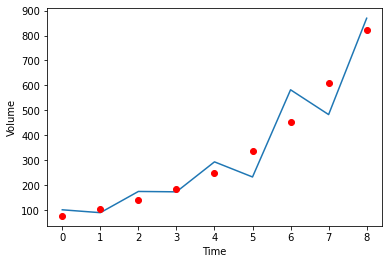

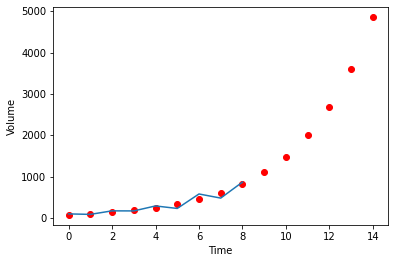

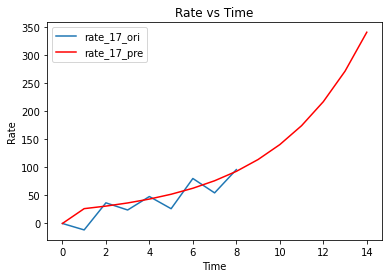

In [0]:
data17 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data17 = data17[data17['id'] == 17]
data17


t17 = data17['Time'].values
vol17 = data17['TumVol'].values
g17 = [27.631,100,0.2]
c17,cov17 = curve_fit(find_volume,t17,vol17,g17,maxfev=10000)
print(c17)
print(cov17)


n17 = len(data17['Time'])
y17 = np.empty(n17)
for i in range(n17):
  y17[i] = find_volume(data17['Time'][i+146],c17[0],c17[1],c17[2])

plt.plot(data17['Time'],data17['TumVol'])
plt.plot(data17['Time'],y17,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n17=15
time17 = np.empty(n17)
vol17 = np.empty(n17)
for i in range(n17):
  x=find_volume(i,c17[0],c17[1],c17[2])
  time17[i] = i
  vol17[i] = x

plt.plot(time17,vol17,'ro')
plt.plot(data17['Time'],data17['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data17['Time'])
y17o = np.empty(n)
y17o[0] = 0
#Vinf17=5037.467
for i in range(n-1):
  #y17o[i+1]=cal_rate(5037.467,0,1,data17['TumVol'][i+146], data17['TumVol'][i+147])
  y17o[i+1]=cal_rate(5037.467,0,i+1,data17['TumVol'][i+147], data17['TumVol'][146])
y17o


y17p=np.empty(n17)
y17p[0]=0
for i in range(n17-1):
  #y17p[i+1]=cal_rate(5037.467,0,1,vol17[i],vol17[i+1])
  y17p[i+1]=cal_rate(5037.467,0,i+1,vol17[i+1],vol17[0])
y17p


plt.plot(data17['Time'],y17o,label='rate_17_ori')
plt.plot(time17,y17p,'r-',label='rate_17_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 18

[7.53322711e+03 1.11705858e+02 4.08534059e-05]
[[ 2.29257005e+14  4.25975629e+08 -1.24354323e+06]
 [ 4.25975629e+08  1.34477523e+03 -2.31068224e+00]
 [-1.24354323e+06 -2.31068224e+00  6.74526721e-03]]


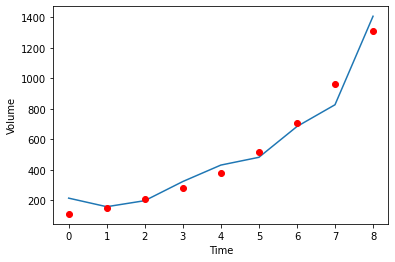

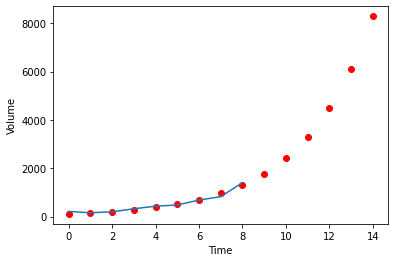

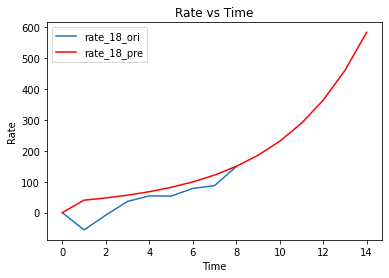

In [0]:
data18 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data18 = data18[data18['id'] == 18]
data18


t18 = data18['Time'].values
vol18 = data18['TumVol'].values
g18 = [27.631,100,0.2]
c18,cov18 = curve_fit(find_volume,t18,vol18,g18,maxfev=10000)
print(c18)
print(cov18)


n18 = len(data18['Time'])
y18 = np.empty(n18)
for i in range(n18):
  y18[i] = find_volume(data18['Time'][i+155],c18[0],c18[1],c18[2])

plt.plot(data18['Time'],data18['TumVol'])
plt.plot(data18['Time'],y18,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n18=15
time18 = np.empty(n18)
vol18 = np.empty(n18)
for i in range(n18):
  x=find_volume(i,c18[0],c18[1],c18[2])
  time18[i] = i
  vol18[i] = x

plt.plot(time18,vol18,'ro')
plt.plot(data18['Time'],data18['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data18['Time'])
y18o = np.empty(n)
y18o[0] = 0
#Vinf18=5037.467
for i in range(n-1):
  #y18o[i+1]=cal_rate(5037.467,0,1,data18['TumVol'][i+155], data18['TumVol'][i+156])
  y18o[i+1]=cal_rate(5037.467,0,i+1,data18['TumVol'][i+156], data18['TumVol'][155])
y18o


y18p=np.empty(n18)
y18p[0]=0
for i in range(n18-1):
  #y18p[i+1]=cal_rate(5037.467,0,1,vol18[i],vol18[i+1])
  y18p[i+1]=cal_rate(5037.467,0,i+1,vol18[i+1],vol18[0])
y18p


plt.plot(data18['Time'],y18o,label='rate_18_ori')
plt.plot(time18,y18p,'r-',label='rate_18_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 19

[5.53379497e+01 1.30359542e+02 4.10314803e-03]
[[ 3.89896498e+06  6.59111745e+04 -2.95235790e+02]
 [ 6.59111745e+04  1.76502459e+03 -5.00634615e+00]
 [-2.95235790e+02 -5.00634615e+00  2.23561236e-02]]


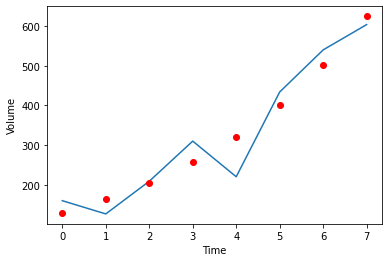

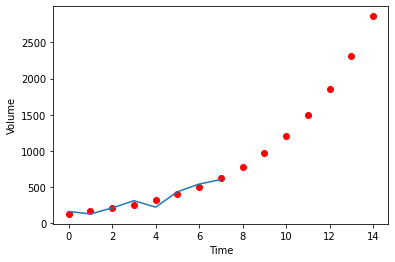

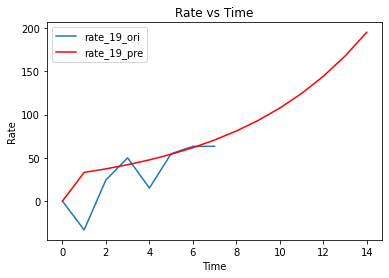

In [0]:
data19 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data19 = data19[data19['id'] == 19]
data19


t19 = data19['Time'].values
vol19 = data19['TumVol'].values
g19 = [27.631,100,0.2]
c19,cov19 = curve_fit(find_volume,t19,vol19,g19,maxfev=10000)
print(c19)
print(cov19)


n19 = len(data19['Time'])
y19 = np.empty(n19)
for i in range(n19):
  y19[i] = find_volume(data19['Time'][i+164],c19[0],c19[1],c19[2])

plt.plot(data19['Time'],data19['TumVol'])
plt.plot(data19['Time'],y19,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n19=15
time19 = np.empty(n19)
vol19 = np.empty(n19)
for i in range(n19):
  x=find_volume(i,c19[0],c19[1],c19[2])
  time19[i] = i
  vol19[i] = x

plt.plot(time19,vol19,'ro')
plt.plot(data19['Time'],data19['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data19['Time'])
y19o = np.empty(n)
y19o[0] = 0
#Vinf19=5037.467
for i in range(n-1):
  #y19o[i+1]=cal_rate(5037.467,0,1,data19['TumVol'][i+164], data19['TumVol'][i+165])
  y19o[i+1]=cal_rate(5037.467,0,i+1,data19['TumVol'][i+165], data19['TumVol'][164])
y19o


y19p=np.empty(n19)
y19p[0]=0
for i in range(n19-1):
  #y19p[i+1]=cal_rate(5037.467,0,1,vol19[i],vol19[i+1])
  y19p[i+1]=cal_rate(5037.467,0,i+1,vol19[i+1],vol19[0])
y19p


plt.plot(data19['Time'],y19o,label='rate_19_ori')
plt.plot(time19,y19p,'r-',label='rate_19_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 20

[6.45311390e+03 1.05819355e+02 3.98878872e-05]
[[ 4.53063507e+14  3.54636181e+08 -2.80086744e+06]
 [ 3.54636181e+08  9.45450323e+02 -2.19254355e+00]
 [-2.80086744e+06 -2.19254355e+00  1.73151409e-02]]


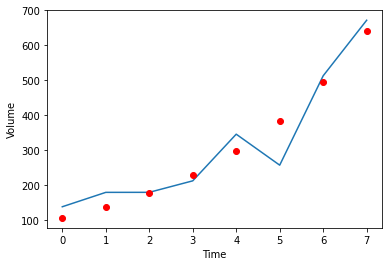

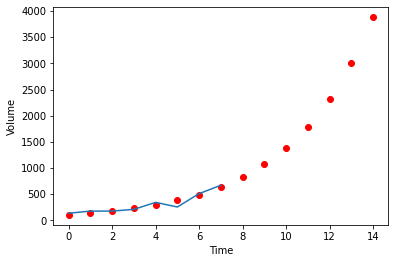

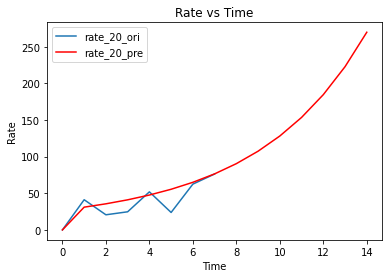

In [0]:
data20 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data20 = data20[data20['id'] == 20]
data20


t20 = data20['Time'].values
vol20 = data20['TumVol'].values
g20 = [27.631,100,0.2]
c20,cov20 = curve_fit(find_volume,t20,vol20,g20,maxfev=10000)
print(c20)
print(cov20)


n20 = len(data20['Time'])
y20 = np.empty(n20)
for i in range(n20):
  y20[i] = find_volume(data20['Time'][i+172],c20[0],c20[1],c20[2])

plt.plot(data20['Time'],data20['TumVol'])
plt.plot(data20['Time'],y20,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n20=15
time20 = np.empty(n20)
vol20 = np.empty(n20)
for i in range(n20):
  x=find_volume(i,c20[0],c20[1],c20[2])
  time20[i] = i
  vol20[i] = x

plt.plot(time20,vol20,'ro')
plt.plot(data20['Time'],data20['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data20['Time'])
y20o = np.empty(n)
y20o[0] = 0
#Vinf20=5037.467
for i in range(n-1):
  #y20o[i+1]=cal_rate(5037.467,0,1,data20['TumVol'][i+172], data20['TumVol'][i+173])
  y20o[i+1]=cal_rate(5037.467,0,i+1,data20['TumVol'][i+173], data20['TumVol'][172])
y20o


y20p=np.empty(n20)
y20p[0]=0
for i in range(n20-1):
  #y20p[i+1]=cal_rate(5037.467,0,1,vol20[i],vol20[i+1])
  y20p[i+1]=cal_rate(5037.467,0,i+1,vol20[i+1],vol20[0])
y20p


plt.plot(data20['Time'],y20o,label='rate_20_ori')
plt.plot(time20,y20p,'r-',label='rate_20_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 21

[4.79491314e+03 8.35224709e+01 4.40044153e-05]
[[ 5.86306445e+14  4.17249665e+08 -5.38155602e+06]
 [ 4.17249665e+08  5.01030324e+02 -3.82992767e+00]
 [-5.38155602e+06 -3.82992767e+00  4.93959183e-02]]


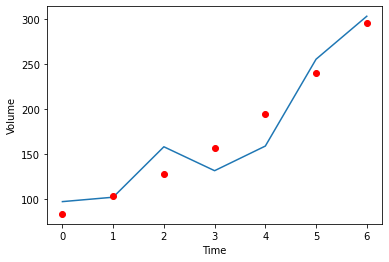

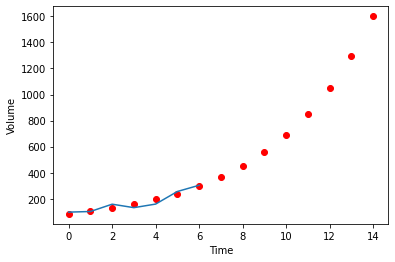

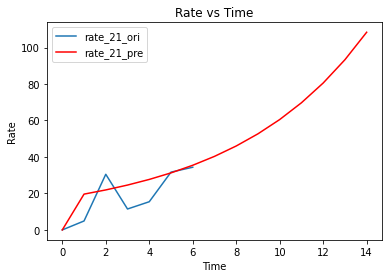

In [0]:
data21 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data21 = data21[data21['id'] == 21]
data21


t21 = data21['Time'].values
vol21 = data21['TumVol'].values
g21 = [27.631,100,0.2]
c21,cov21 = curve_fit(find_volume,t21,vol21,g21,maxfev=10000)
print(c21)
print(cov21)


n21 = len(data21['Time'])
y21 = np.empty(n21)
for i in range(n21):
  y21[i] = find_volume(data21['Time'][i+180],c21[0],c21[1],c21[2])

plt.plot(data21['Time'],data21['TumVol'])
plt.plot(data21['Time'],y21,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n21=15
time21 = np.empty(n21)
vol21 = np.empty(n21)
for i in range(n21):
  x=find_volume(i,c21[0],c21[1],c21[2])
  time21[i] = i
  vol21[i] = x

plt.plot(time21,vol21,'ro')
plt.plot(data21['Time'],data21['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data21['Time'])
y21o = np.empty(n)
y21o[0] = 0
#Vinf21=5037.467
for i in range(n-1):
  #y21o[i+1]=cal_rate(5037.467,0,1,data21['TumVol'][i+180], data21['TumVol'][i+181])
  y21o[i+1]=cal_rate(5037.467,0,i+1,data21['TumVol'][i+181], data21['TumVol'][180])
y21o


y21p=np.empty(n21)
y21p[0]=0
for i in range(n21-1):
  #y21p[i+1]=cal_rate(5037.467,0,1,vol21[i],vol21[i+1])
  y21p[i+1]=cal_rate(5037.467,0,i+1,vol21[i+1],vol21[0])
y21p


plt.plot(data21['Time'],y21o,label='rate_21_ori')
plt.plot(time21,y21p,'r-',label='rate_21_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 22

[4.51354051e+03 9.62610823e+01 6.28646311e-05]
[[ 5.31790404e+13  3.61872026e+08 -7.41100781e+05]
 [ 3.61872026e+08  3.42870134e+03 -5.04330843e+00]
 [-7.41100781e+05 -5.04330843e+00  1.03279481e-02]]


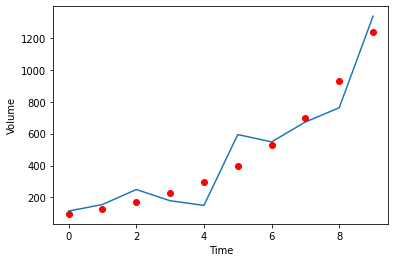

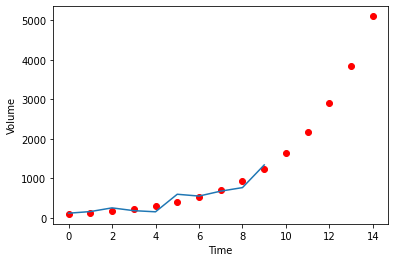

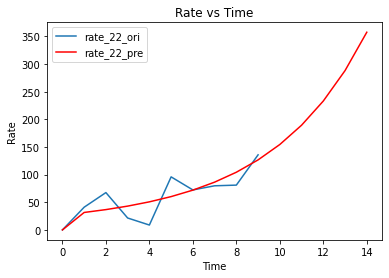

In [0]:
data22 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data22 = data22[data22['id'] == 22]
data22


t22 = data22['Time'].values
vol22 = data22['TumVol'].values
g22 = [27.631,100,0.2]
c22,cov22 = curve_fit(find_volume,t22,vol22,g22,maxfev=10000)
print(c22)
print(cov22)


n22 = len(data22['Time'])
y22 = np.empty(n22)
for i in range(n22):
  y22[i] = find_volume(data22['Time'][i+187],c22[0],c22[1],c22[2])

plt.plot(data22['Time'],data22['TumVol'])
plt.plot(data22['Time'],y22,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n22=15
time22 = np.empty(n22)
vol22 = np.empty(n22)
for i in range(n22):
  x=find_volume(i,c22[0],c22[1],c22[2])
  time22[i] = i
  vol22[i] = x

plt.plot(time22,vol22,'ro')
plt.plot(data22['Time'],data22['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data22['Time'])
y22o = np.empty(n)
y22o[0] = 0
#Vinf22=5037.467
for i in range(n-1):
  #y22o[i+1]=cal_rate(5037.467,0,1,data22['TumVol'][i+187], data22['TumVol'][i+188])
  y22o[i+1]=cal_rate(5037.467,0,i+1,data22['TumVol'][i+188], data22['TumVol'][187])
y22o


y22p=np.empty(n22)
y22p[0]=0
for i in range(n22-1):
  #y22p[i+1]=cal_rate(5037.467,0,1,vol22[i],vol22[i+1])
  y22p[i+1]=cal_rate(5037.467,0,i+1,vol22[i+1],vol22[0])
y22p


plt.plot(data22['Time'],y22o,label='rate_22_ori')
plt.plot(time22,y22p,'r-',label='rate_22_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 23

[7.22295238e+03 7.99589781e+01 3.69980551e-05]
[[ 4.12107944e+13  1.10050827e+08 -2.11151172e+05]
 [ 1.10050827e+08  5.47998257e+02 -5.63914940e-01]
 [-2.11151172e+05 -5.63914940e-01  1.08187233e-03]]


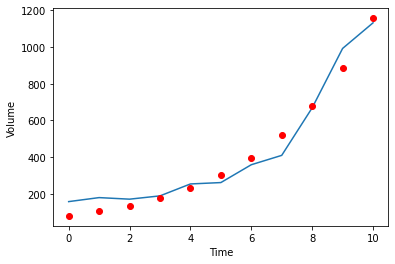

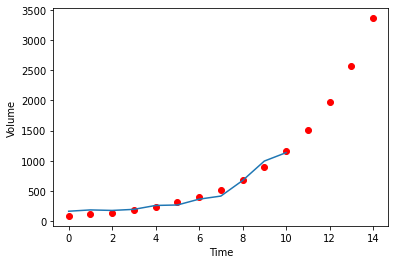

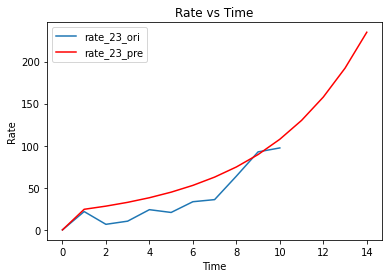

In [0]:
data23 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data23 = data23[data23['id'] == 23]
data23


t23 = data23['Time'].values
vol23 = data23['TumVol'].values
g23 = [27.631,100,0.2]
c23,cov23 = curve_fit(find_volume,t23,vol23,g23,maxfev=10000)
print(c23)
print(cov23)


n23 = len(data23['Time'])
y23 = np.empty(n23)
for i in range(n23):
  y23[i] = find_volume(data23['Time'][i+197],c23[0],c23[1],c23[2])

plt.plot(data23['Time'],data23['TumVol'])
plt.plot(data23['Time'],y23,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n23=15
time23 = np.empty(n23)
vol23 = np.empty(n23)
for i in range(n23):
  x=find_volume(i,c23[0],c23[1],c23[2])
  time23[i] = i
  vol23[i] = x

plt.plot(time23,vol23,'ro')
plt.plot(data23['Time'],data23['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data23['Time'])
y23o = np.empty(n)
y23o[0] = 0
#Vinf23=5037.467
for i in range(n-1):
  #y23o[i+1]=cal_rate(5037.467,0,1,data23['TumVol'][i+197], data23['TumVol'][i+198])
  y23o[i+1]=cal_rate(5037.467,0,i+1,data23['TumVol'][i+198], data23['TumVol'][197])
y23o


y23p=np.empty(n23)
y23p[0]=0
for i in range(n23-1):
  #y23p[i+1]=cal_rate(5037.467,0,1,vol23[i],vol23[i+1])
  y23p[i+1]=cal_rate(5037.467,0,i+1,vol23[i+1],vol23[0])
y23p


plt.plot(data23['Time'],y23o,label='rate_23_ori')
plt.plot(time23,y23p,'r-',label='rate_23_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 24

[  2.55492827 119.73727874   0.14972588]
[[ 8.91998209e-01  2.10002081e+01 -1.23859955e-01]
 [ 2.10002081e+01  6.26252123e+03 -1.09360456e+01]
 [-1.23859955e-01 -1.09360456e+01  2.85350351e-02]]


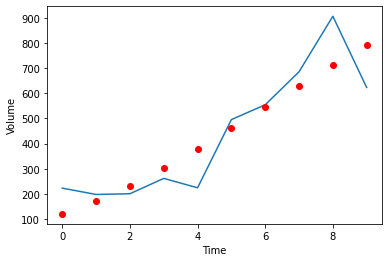

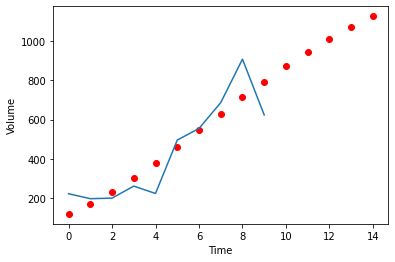

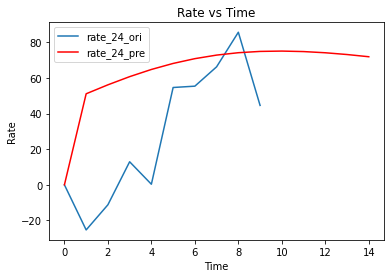

In [0]:
data24 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data24 = data24[data24['id'] == 24]
data24


t24 = data24['Time'].values
vol24 = data24['TumVol'].values
g24 = [27.631,100,0.2]
c24,cov24 = curve_fit(find_volume,t24,vol24,g24,maxfev=10000)
print(c24)
print(cov24)


n24 = len(data24['Time'])
y24 = np.empty(n24)
for i in range(n24):
  y24[i] = find_volume(data24['Time'][i+208],c24[0],c24[1],c24[2])

plt.plot(data24['Time'],data24['TumVol'])
plt.plot(data24['Time'],y24,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n24=15
time24 = np.empty(n24)
vol24 = np.empty(n24)
for i in range(n24):
  x=find_volume(i,c24[0],c24[1],c24[2])
  time24[i] = i
  vol24[i] = x

plt.plot(time24,vol24,'ro')
plt.plot(data24['Time'],data24['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data24['Time'])
y24o = np.empty(n)
y24o[0] = 0
#Vinf24=5037.467
for i in range(n-1):
  #y24o[i+1]=cal_rate(5037.467,0,1,data24['TumVol'][i+208], data24['TumVol'][i+209])
  y24o[i+1]=cal_rate(5037.467,0,i+1,data24['TumVol'][i+209], data24['TumVol'][208])
y24o


y24p=np.empty(n24)
y24p[0]=0
for i in range(n24-1):
  #y24p[i+1]=cal_rate(5037.467,0,1,vol24[i],vol24[i+1])
  y24p[i+1]=cal_rate(5037.467,0,i+1,vol24[i+1],vol24[0])
y24p


plt.plot(data24['Time'],y24o,label='rate_24_ori')
plt.plot(time24,y24p,'r-',label='rate_24_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 26

[  2.21095812 114.64871859   0.14143245]
[[ 3.38280334e+00  6.64694916e+01 -4.60184925e-01]
 [ 6.64694916e+01  5.87915325e+03 -1.63448604e+01]
 [-4.60184925e-01 -1.63448604e+01  7.46725683e-02]]


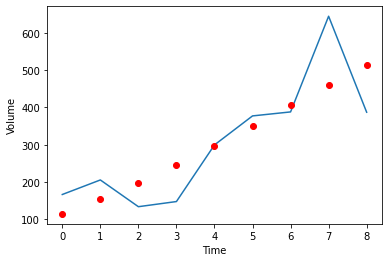

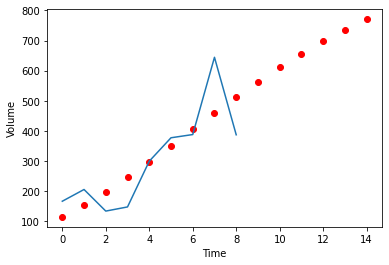

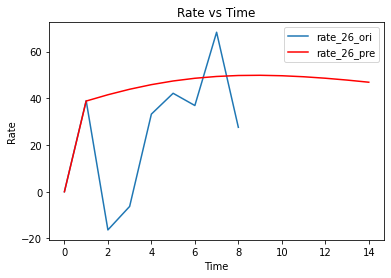

In [0]:
data26 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data26 = data26[data26['id'] == 26]
data26


t26 = data26['Time'].values
vol26 = data26['TumVol'].values
g26 = [27.631,100,0.2]
c26,cov26 = curve_fit(find_volume,t26,vol26,g26,maxfev=10000)
print(c26)
print(cov26)


n26 = len(data26['Time'])
y26 = np.empty(n26)
for i in range(n26):
  y26[i] = find_volume(data26['Time'][i+229],c26[0],c26[1],c26[2])

plt.plot(data26['Time'],data26['TumVol'])
plt.plot(data26['Time'],y26,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n26=15
time26 = np.empty(n26)
vol26 = np.empty(n26)
for i in range(n26):
  x=find_volume(i,c26[0],c26[1],c26[2])
  time26[i] = i
  vol26[i] = x

plt.plot(time26,vol26,'ro')
plt.plot(data26['Time'],data26['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data26['Time'])
y26o = np.empty(n)
y26o[0] = 0
#Vinf26=5037.467
for i in range(n-1):
  #y26o[i+1]=cal_rate(5037.467,0,1,data26['TumVol'][i+229], data26['TumVol'][i+230])
  y26o[i+1]=cal_rate(5037.467,0,i+1,data26['TumVol'][i+230], data26['TumVol'][229])
y26o


y26p=np.empty(n26)
y26p[0]=0
for i in range(n26-1):
  #y26p[i+1]=cal_rate(5037.467,0,1,vol26[i],vol26[i+1])
  y26p[i+1]=cal_rate(5037.467,0,i+1,vol26[i+1],vol26[0])
y26p


plt.plot(data26['Time'],y26o,label='rate_26_ori')
plt.plot(time26,y26p,'r-',label='rate_26_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 27

[4.98068785e+03 9.79845712e+01 4.66613057e-05]
[[ 1.93401613e+14  8.30517182e+08 -1.81296162e+06]
 [ 8.30517182e+08  4.67009383e+03 -7.78558826e+00]
 [-1.81296162e+06 -7.78558826e+00  1.69948419e-02]]


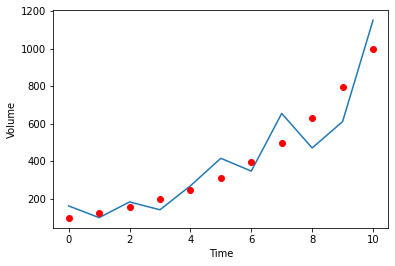

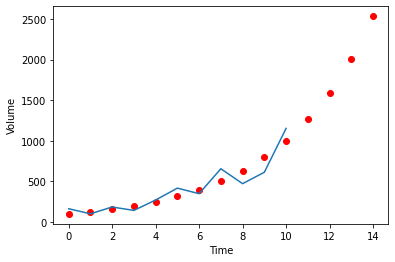

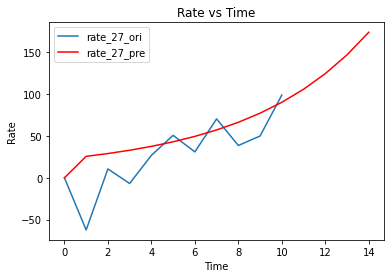

In [0]:
data27 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data27 = data27[data27['id'] == 27]
data27


t27 = data27['Time'].values
vol27 = data27['TumVol'].values
g27 = [27.631,100,0.2]
c27,cov27 = curve_fit(find_volume,t27,vol27,g27,maxfev=10000)
print(c27)
print(cov27)


n27 = len(data27['Time'])
y27 = np.empty(n27)
for i in range(n27):
  y27[i] = find_volume(data27['Time'][i+238],c27[0],c27[1],c27[2])

plt.plot(data27['Time'],data27['TumVol'])
plt.plot(data27['Time'],y27,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n27=15
time27 = np.empty(n27)
vol27 = np.empty(n27)
for i in range(n27):
  x=find_volume(i,c27[0],c27[1],c27[2])
  time27[i] = i
  vol27[i] = x

plt.plot(time27,vol27,'ro')
plt.plot(data27['Time'],data27['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data27['Time'])
y27o = np.empty(n)
y27o[0] = 0
#Vinf27=5037.467
for i in range(n-1):
  #y27o[i+1]=cal_rate(5037.467,0,1,data27['TumVol'][i+238], data27['TumVol'][i+239])
  y27o[i+1]=cal_rate(5037.467,0,i+1,data27['TumVol'][i+239], data27['TumVol'][238])
y27o


y27p=np.empty(n27)
y27p[0]=0
for i in range(n27-1):
  #y27p[i+1]=cal_rate(5037.467,0,1,vol27[i],vol27[i+1])
  y27p[i+1]=cal_rate(5037.467,0,i+1,vol27[i+1],vol27[0])
y27p


plt.plot(data27['Time'],y27o,label='rate_27_ori')
plt.plot(time27,y27p,'r-',label='rate_27_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



ID: 28

[  1.36556698 174.9194709    0.17869254]
[[ 1.61865877e+00  3.52508800e+01 -4.33474753e-01]
 [ 3.52508800e+01  5.87114967e+03 -2.05109355e+01]
 [-4.33474753e-01 -2.05109355e+01  1.41588791e-01]]


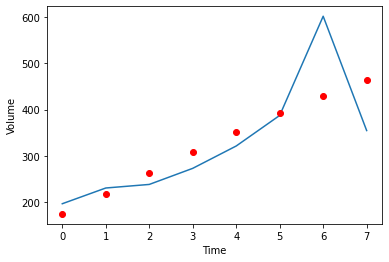

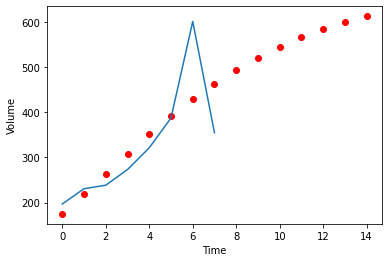

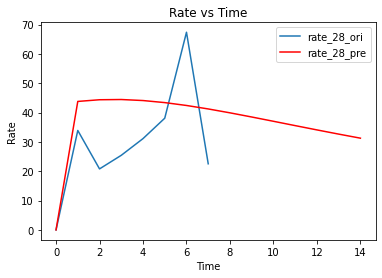

In [0]:
data28 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data28 = data28[data28['id'] == 28]
data28


t28 = data28['Time'].values
vol28 = data28['TumVol'].values
g28 = [27.631,100,0.2]
c28,cov28 = curve_fit(find_volume,t28,vol28,g28,maxfev=10000)
print(c28)
print(cov28)


n28 = len(data28['Time'])
y28 = np.empty(n28)
for i in range(n28):
  y28[i] = find_volume(data28['Time'][i+249],c28[0],c28[1],c28[2])

plt.plot(data28['Time'],data28['TumVol'])
plt.plot(data28['Time'],y28,'ro')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n28=15
time28 = np.empty(n28)
vol28 = np.empty(n28)
for i in range(n28):
  x=find_volume(i,c28[0],c28[1],c28[2])
  time28[i] = i
  vol28[i] = x

plt.plot(time28,vol28,'ro')
plt.plot(data28['Time'],data28['TumVol'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


n = len(data28['Time'])
y28o = np.empty(n)
y28o[0] = 0
#Vinf28=5037.467
for i in range(n-1):
  #y28o[i+1]=cal_rate(5037.467,0,1,data28['TumVol'][i+249], data28['TumVol'][i+250])
  y28o[i+1]=cal_rate(5037.467,0,i+1,data28['TumVol'][i+250], data28['TumVol'][249])
y28o


y28p=np.empty(n28)
y28p[0]=0
for i in range(n28-1):
  #y28p[i+1]=cal_rate(5037.467,0,1,vol28[i],vol28[i+1])
  y28p[i+1]=cal_rate(5037.467,0,i+1,vol28[i+1],vol28[0])
y28p


plt.plot(data28['Time'],y28o,label='rate_28_ori')
plt.plot(time28,y28p,'r-',label='rate_28_pre')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rate vs Time')
plt.legend()
plt.show()



All rate vs time graph at one place

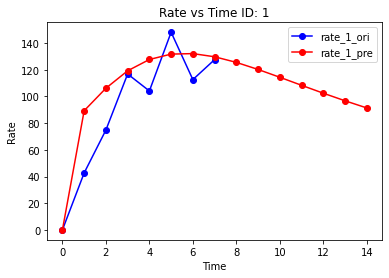

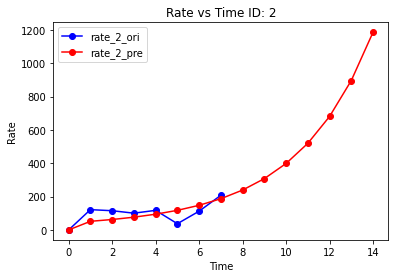

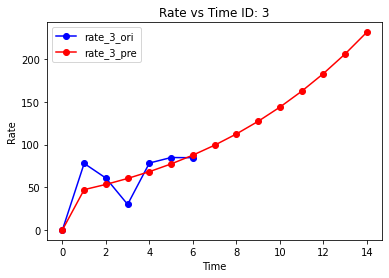

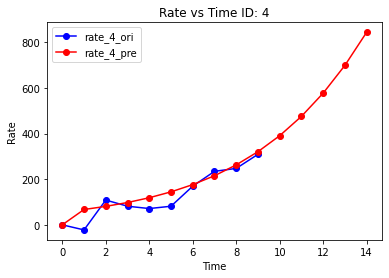

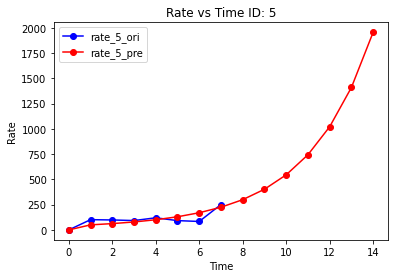

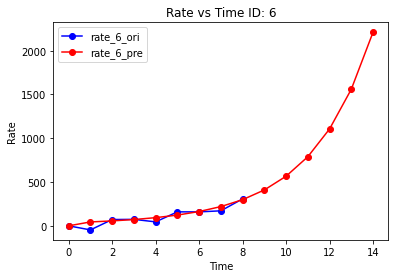

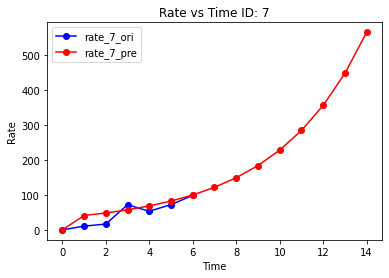

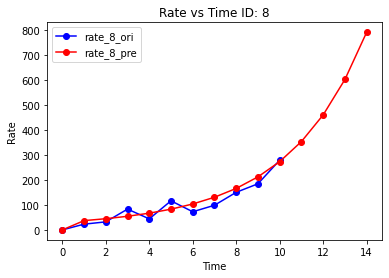

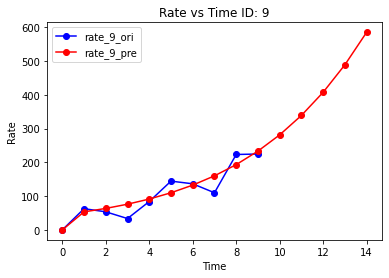

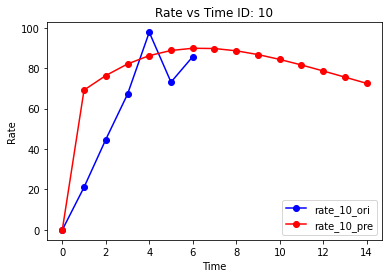

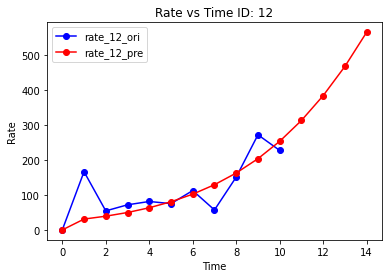

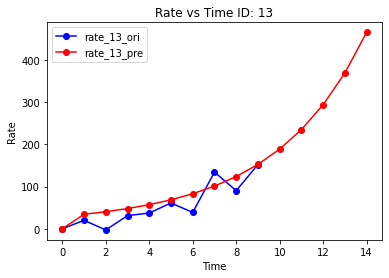

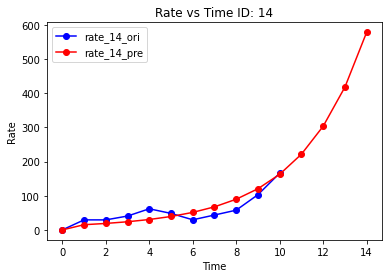

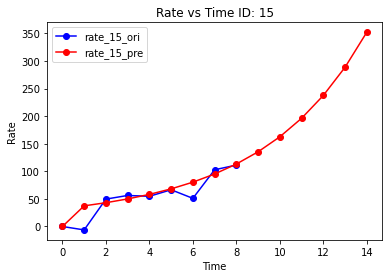

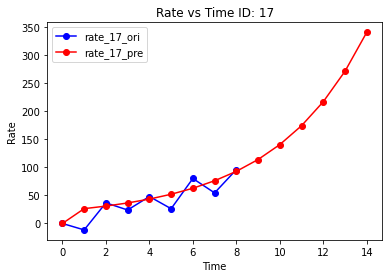

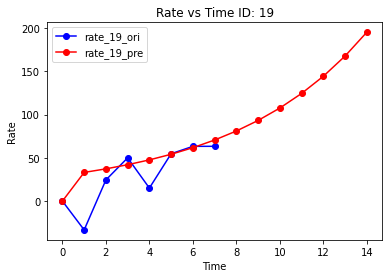

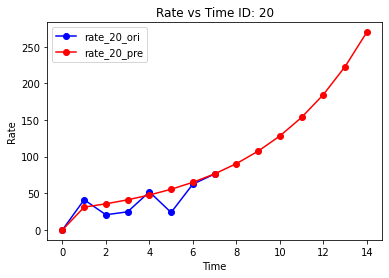

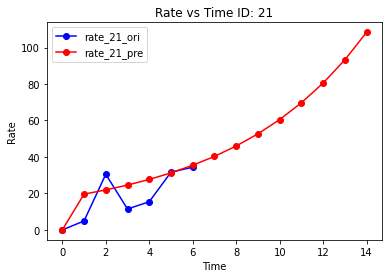

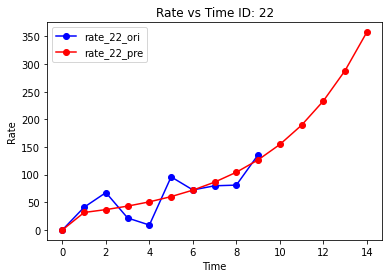

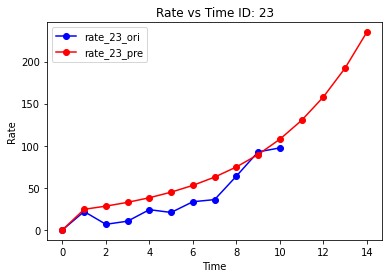

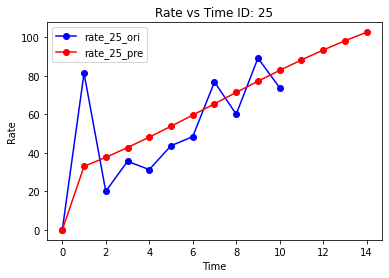

In [0]:
list = [11,16,18,24,26,27,28]
for i in range (1,29):
  if i in list:
    continue
  exec("data=data"+str(i)+"['Time']")
  exec("yori=y"+str(i)+"o")
  exec("ypre=y"+str(i)+"p")
  label_ori="rate_"+str(i)+"_ori"
  label_pre="rate_"+str(i)+"_pre"
  exec("time=time"+str(i))

  plt.plot(data,yori,'bo-',label=label_ori)
  plt.plot(time,ypre,'ro-',label=label_pre)
  '''
  for x,y in zip(data,np.round(yori,1)):                                       
    label = "{:.2f}".format(y)
    plt.annotate(label, xy=(x,y), xytext=(x,y-25),
            arrowprops=dict(arrowstyle="->"),
            )

  plt.plot(time,ypre,'ro-',label=label_pre)
  for x,y in zip(time,np.round(ypre,1)):                                       
    label = "{:.2f}".format(y)
    plt.annotate(label, xy=(x,y), xytext=(x,y+25),
            arrowprops=dict(arrowstyle="->"),
            )
  '''
  plt.xlabel('Time')
  plt.ylabel('Rate')
  plt.title('Rate vs Time ID: '+str(i))
  plt.legend()
  plt.show()

RMSE with details


In [0]:
from prettytable import PrettyTable
from math import sqrt

for i in range(1,29):
  if i in list:
    continue
  exec("Act_Vol=data"+str(i)+"['TumVol'].values")
  exec("time=data"+str(i)+"['Time']")
  exec("Pre_Vol=y"+str(i))
  n = len(time)
  rmse = np.sqrt(((abs(np.subtract(Pre_Vol,Act_Vol)))**2).sum()/n)
  print("Volume data for ID :", i)
  t = PrettyTable(['predicted volume', 'Actual Volume','Diff btw Volume','Diff btw their square'])
  for j in range(n):
      t.add_row([round(Pre_Vol[j],1),Act_Vol[j],round(abs(np.subtract(Pre_Vol[j],Act_Vol[j])),1),round(abs(np.subtract(Pre_Vol[j],Act_Vol[j]))**2,1)])
  print(t)
  print("RMSE of Volumes for ID "+ str(i) + " : "+ str(round(rmse,2)) + "\n")


Volume data for ID : 1
+------------------+---------------+-----------------+-----------------------+
| predicted volume | Actual Volume | Diff btw Volume | Diff btw their square |
+------------------+---------------+-----------------+-----------------------+
|       86.2       |     120.1     |       33.9      |         1148.0        |
|      175.5       |     162.8     |       12.7      |         162.2         |
|      298.5       |     269.8     |       28.7      |         826.2         |
|      443.9       |     470.6     |       26.7      |         712.5         |
|      597.0       |     536.6     |       60.4      |         3650.0        |
|      744.9       |     860.7     |      115.8      |        13402.6        |
|      878.9       |     795.9     |       83.0      |         6883.6        |
|      994.4       |     1013.3    |       18.9      |         357.1         |
+------------------+---------------+-----------------+-----------------------+
RMSE of Volumes for ID 1 : 58

In [0]:
for i in range(1,29):
  if i in list:
    continue
  exec("Act_rate=y"+str(i)+"o")
  exec("Pre_rate=y"+str(i)+"p")
  exec("time=data"+str(i)+"['Time']")
  n = len(time)
  Pre_rate = Pre_rate[:n]
  rmse = np.sqrt(((abs(np.subtract(Pre_rate,Act_rate)))**2).sum()/n)
  print("Rate data for ID :", i)
  t = PrettyTable(['predicted Rate', 'Actual Rate','Diff btw Rate','Diff btw their square'])
  for j in range(1,n):
      t.add_row([round(Pre_rate[j],1),round(Act_rate[j],1),round(abs(np.subtract(Pre_rate[j],Act_rate[j])),1),round(abs(np.subtract(Pre_rate[j],Act_rate[j]))**2,1)])
  print(t)
  print("RMSE of Rates for ID "+ str(i) + " : "+ str(round(rmse,2)) + "\n")

Rate data for ID : 1
+----------------+-------------+---------------+-----------------------+
| predicted Rate | Actual Rate | Diff btw Rate | Diff btw their square |
+----------------+-------------+---------------+-----------------------+
|      89.3      |     42.7    |      46.6     |         2173.2        |
|     106.2      |     74.9    |      31.3     |         980.5         |
|     119.2      |    116.8    |      2.4      |          5.7          |
|     127.7      |    104.1    |      23.6     |         555.7         |
|     131.7      |    148.1    |      16.4     |         268.2         |
|     132.1      |    112.6    |      19.5     |         379.3         |
|     129.7      |    127.6    |      2.1      |          4.6          |
+----------------+-------------+---------------+-----------------------+
RMSE of Rates for ID 1 : 23.36

Rate data for ID : 2
+----------------+-------------+---------------+-----------------------+
| predicted Rate | Actual Rate | Diff btw Rate | D

Rate/Volume vs Time

In [0]:
tim = np.empty(11)
rvp = np.empty(11)
rvo = np.empty(11)

for i in range(1,11):
  tim[i-1]=math.log(i)
  rvp[i-1]=math.log(y23p[i]/vol23[i-1])
  rvo[i-1]=math.log(y23o[i]/data23['TumVol'][i+197-1])



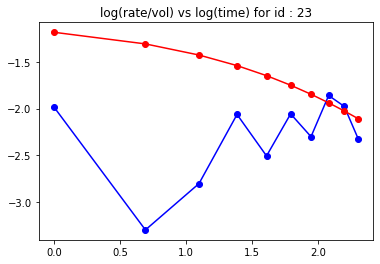

In [0]:
plt.plot(tim[:10],rvo[:10],'bo-')
plt.plot(tim[:10],rvp[:10],'ro-')
plt.title('log(rate/vol) vs log(time) for id : 23')
plt.show()

In [0]:
tim = np.empty(11)
rvp = np.empty(11)
rvo = np.empty(11)

for i in range(1,11):
  tim[i-1]=math.log(i)
  rvp[i-1]=math.log(y23p[i]/vol23[0])
  rvo[i-1]=math.log(y23o[i]/data23['TumVol'][197])

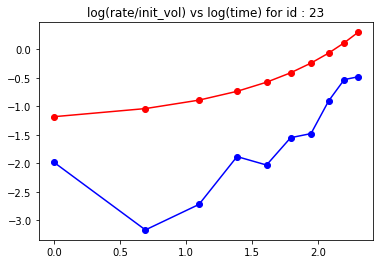

In [0]:
plt.plot(tim[:10],rvo[:10],'bo-')
plt.plot(tim[:10],rvp[:10],'ro-')
plt.title('log(rate/init_vol) vs log(time) for id : 23')
plt.show()